# **MSc Data Science thesis project: Micromobility vehicle parking**
## **Pre-processing and exploring the vehicle parking behavior**

### **1 Import libraries**

In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pygeos
from shapely.geometry.collection import GeometryCollection
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
import seaborn as sn
%matplotlib inline
import seaborn as sns
from datetime import datetime
import folium
from shapely.geometry import Point, LineString

from scipy import stats
import sklearn

# Set main directories
main_path = ''
vehicle_parking_raw_path = main_path + '/vehicle_parking_raw/'
shapefiles_path = main_path + '/vehicle_parking_shapefiles/'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

C:\Users\jfieb\anaconda3\envs\py37\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### **2 Read the vehicle parking data**

In [2]:
# Read the (raw) vehicle parking count data from 2018, 2019, 2020 and 2021
raw_parking_2018 = pd.read_csv(vehicle_parking_raw_path + '2018_raw.csv',delimiter=';',encoding = 'utf-8-sig')
raw_parking_2019 = pd.read_csv(vehicle_parking_raw_path + '2019_raw.csv',delimiter=';',encoding = 'utf-8-sig')
raw_parking_2020 = pd.read_csv(vehicle_parking_raw_path + '2020_raw.csv',delimiter=';',encoding = 'utf-8-sig')
raw_parking_2021 = pd.read_csv(vehicle_parking_raw_path + '2021_raw.csv',delimiter=';',encoding = 'utf-8-sig')

### **3 Explore the vehicle parking data**

In [3]:
raw_parking_2018.head(5)

id day_part  section_2018 letter   merged  section_2016  id_total  \
0  1199945   middag         35617     bv  35617bv       35617.0       NaN   
1  1199946   middag         35617      r   35617r       35617.0       NaN   
2  1199947   middag         35617      n   35617n       35617.0       NaN   
3  1199948   middag         35617      v   35617v       35617.0       NaN   
4  1199949   middag         35617     vn  35617vn       35617.0       NaN   

          sort  group  year  date  day  time_code     time_period  \
0       sectie    NaN  2018   NaN  NaN        NaN  13:00 - 14:00h   
1  voorziening    NaN  2018   NaN  NaN        NaN  13:00 - 14:00h   
2  voorziening    NaN  2018   NaN  NaN        NaN  13:00 - 14:00h   
3  voorziening    NaN  2018   NaN  NaN        NaN  13:00 - 14:00h   
4  voorziening    NaN  2018   NaN  NaN        NaN  13:00 - 14:00h   

               district ois_2015 ois_2018        street  category  district_2  \
0  Zuid (Buitenveldert)     K90g     K23c  De Boelelaan       NaN         NaN   
1  Zuid (Buitenveldert)     K90g     K23c  De Boelelaan       NaN         NaN   
2  Zuid (Buitenveldert)     K90g     K23c  De Boelelaan       NaN         NaN   
3  Zuid (Buitenveldert)     K90g     K23c  De Boelelaan       NaN         NaN   
4  Zuid (Buitenveldert)     K90g     K23c  De Boelelaan       NaN         NaN   

   facility_id            location            facility  cap_bike  cap_moped  \
0            0  buiten voorziening  Buiten voorziening         0        NaN   
1            1      in voorziening               Rek           0        NaN   
2            2      in voorziening           Nietjes          12        NaN   
3            3      in voorziening               Vak           0        NaN   
4            4      in voorziening     Vak met nietjes         0        NaN   

   cap_brokenup  cap_private cap_comment  bike  moped_yellow  moped_blue  \
0             0            0         NaN     0             0           0   
1             0            0         NaN     0             0           0   
2             0            0         NaN     7             1           1   
3             0            0         NaN     0             0           0   
4             0            0         NaN     0             0           0   

   cargo_bike motor  fourwheeler  stock  total_unmotorized  total_twowheeler  \
0           0     0            0      0                  0                 0   
1           0     0            0      0                  0                 0   
2           0     0            0      0                  7                 9   
3           0     0            0      0                  0                 0   
4           0     0            0      0                  0                 0   

    area measured_by  
0  321.6      Trajan  
1  321.6      Trajan  
2  321.6      Trajan  
3  321.6      Trajan  
4  321.6      Trajan

In [4]:
raw_parking_2019.head(5)

id day_part  section_2018 letter   merged section_2016  id_total  \
0  1011881.0   middag         11494     bv  11494bv     109327.0       NaN   
1  1011882.0   middag         11494      r   11494r     109327.0       NaN   
2  1011883.0   middag         11494      n   11494n     109327.0       NaN   
3  1011884.0   middag         11494      v   11494v     109327.0       NaN   
4  1011885.0   middag         11494     vn  11494vn     109327.0       NaN   

          sort group  year  date  day  time_code     time_period district  \
0       sectie   NaN  2019   NaN  NaN        NaN  13:00 - 14:00h  Centrum   
1  voorziening   NaN  2019   NaN  NaN        NaN  13:00 - 14:00h  Centrum   
2  voorziening   NaN  2019   NaN  NaN        NaN  13:00 - 14:00h  Centrum   
3  voorziening   NaN  2019   NaN  NaN        NaN  13:00 - 14:00h  Centrum   
4  voorziening   NaN  2019   NaN  NaN        NaN  13:00 - 14:00h  Centrum   

  ois_2015 ois_2018             street  category district_2 district_nr  \
0     A09e     A09e  Czaar Peterstraat       NaN    centrum  centrum-78   
1     A09e     A09e  Czaar Peterstraat       NaN    centrum  centrum-78   
2     A09e     A09e  Czaar Peterstraat       NaN    centrum  centrum-78   
3     A09e     A09e  Czaar Peterstraat       NaN    centrum  centrum-78   
4     A09e     A09e  Czaar Peterstraat       NaN    centrum  centrum-78   

   facility_id            location            facility  cap_bike  cap_moped  \
0            0  Buiten voorziening  Buiten voorziening       0.0        NaN   
1            1      in voorziening               Rek         0.0        NaN   
2            2      in voorziening           Nietjes        48.0        NaN   
3            3      in voorziening               Vak         0.0        NaN   
4            4      in voorziening         Gemengd vak       0.0        NaN   

   cap_brokenup  cap_private cap_comment  bike  moped_yellow  moped_blue  \
0           0.0          0.0         NaN   1.0           0.0         0.0   
1           0.0          0.0         NaN   0.0           0.0         0.0   
2           0.0          0.0         NaN  35.0           0.0         0.0   
3           0.0          0.0         NaN   0.0           0.0         0.0   
4           0.0          0.0         NaN   0.0           0.0         0.0   

   cargo_bike  motor  fourwheeler  stock  total_unmotorized  total_twowheeler  \
0         0.0    0.0          0.0    0.0                  1                 1   
1         0.0    0.0          0.0    0.0                  0                 0   
2         1.0    0.0          0.0    0.0                 36                36   
3         0.0    0.0          0.0    0.0                  0                 0   
4         0.0    0.0          0.0    0.0                  0                 0   

    area measured_by  
0  351.5      Trajan  
1  351.5      Trajan  
2  351.5      Trajan  
3  351.5      Trajan  
4  351.5      Trajan

In [5]:
raw_parking_2020.head(5)

section_2018        street              neighborhood   ois  year day_part  \
0        100000  Weesperzijde  Weesperzijde Midden/Zuid  M27b  2020    avond   
1        100000  Weesperzijde  Weesperzijde Midden/Zuid  M27b  2020    avond   
2        100000  Weesperzijde  Weesperzijde Midden/Zuid  M27b  2020    avond   
3        100000  Weesperzijde  Weesperzijde Midden/Zuid  M27b  2020    avond   
4        100000  Weesperzijde  Weesperzijde Midden/Zuid  M27b  2020    avond   

  horeca_ov               facility  cap_bike  cap_moped  cap_brokenup  \
0       NaN  0. Buiten voorziening         0          0             0   
1       NaN                 1. Rek         0          0             0   
2       NaN             2. Nietjes         2          0             0   
3       NaN                 3. Vak         0          0             0   
4       NaN         4. Gemengd vak         0          0             0   

   cap_private cap_comment  bike  moped_yellow  moped_blue  cargo_bike  motor  \
0            0         NaN     6             0           0           0      0   
1            0         NaN     0             0           0           0      0   
2            0         NaN     2             0           0           0      0   
3            0         NaN     0             0           0           0      0   
4            0         NaN     0             0           0           0      0   

   fourwheeler  stock  rent_shared_bike  brokenup  sum_cap  sum_count  
0            0      0                 0         0        0          6  
1            0      0                 0         0        0          0  
2            0      0                 0         0        2          2  
3            0      0                 0         0        0          0  
4            0      0                 0         0        0          0

In [6]:
raw_parking_2021.head(5)

section_2018                    street      neighbourhood   ois district  \
0         10001           Ooster Ringdijk  Science Park Zuid  M56i     Oost   
1         10002  Westel Merwedekanaaldijk  Science Park Zuid  M56i     Oost   
2         10003           Ooster Ringdijk  Science Park Zuid  M56i     Oost   
3         10004  Westel Merwedekanaaldijk  Science Park Zuid  M56i     Oost   
4         10005           Ooster Ringdijk  Science Park Zuid  M56i     Oost   

   year day_part    time_period               facility  cap_bike  cap_moped  \
0  2021   middag  12:00 - 16:00  0. Buiten voorziening         0          0   
1  2021   middag  12:00 - 16:00  0. Buiten voorziening         0          0   
2  2021   middag  12:00 - 16:00  0. Buiten voorziening         0          0   
3  2021   middag  12:00 - 16:00  0. Buiten voorziening         0          0   
4  2021   middag  12:00 - 16:00  0. Buiten voorziening         0          0   

   cap_brokenup  cap_private  bike  moped_yellow  moped_blue  cargo_bike  \
0             0            0     0             0           0           0   
1             0            0     1             0           0           0   
2             0            0     0             0           0           0   
3             0            0     0             0           0           0   
4             0            0     0             0           0           0   

   motor  fourwheeler  stock  rent_shared_bike  brokenup  sum_cap  sum_count  
0      0            0      0                 0         0        0          0  
1      0            0      0                 0         0        0          1  
2      0            0      0                 0         0        0          0  
3      0            0      0                 0         0        0          0  
4      0            0      0                 0         0        0          0

In [4]:
print('The datasets have different shapes')
print('2018: ' + str(raw_parking_2018.shape))
print('2019: ' + str(raw_parking_2019.shape))
print('2020: ' + str(raw_parking_2020.shape))
print('2021: ' + str(raw_parking_2021.shape))

The datasets have different shapes
2018: (260432, 39)
2019: (124767, 40)
2020: (103208, 24)
2021: (23996, 24)


In [5]:
print('The datasets contain different features:')
print('2018')
print(str(raw_parking_2018.columns))
print('2019')
print(str(raw_parking_2019.columns))
print('2020')
print(str(raw_parking_2020.columns))
print('2021')
print(str(raw_parking_2021.columns))

The datasets contain different features:
2018
Index(['id', 'day_part', 'section_2018', 'letter', 'merged', 'section_2016',
       'id_total', 'sort', 'group', 'year', 'date', 'day', 'time_code',
       'time_period', 'district', 'ois_2015', 'ois_2018', 'street', 'category',
       'district_2', 'facility_id', 'location', 'facility', 'cap_bike',
       'cap_moped', 'cap_brokenup', 'cap_private', 'cap_comment', 'bike',
       'moped_yellow', 'moped_blue', 'cargo_bike', 'motor', 'fourwheeler',
       'stock', 'total_unmotorized', 'total_twowheeler', 'area',
       'measured_by'],
      dtype='object')
2019
Index(['id', 'day_part', 'section_2018', 'letter', 'merged', 'section_2016',
       'id_total', 'sort', 'group', 'year', 'date', 'day', 'time_code',
       'time_period', 'district', 'ois_2015', 'ois_2018', 'street', 'category',
       'district_2', 'district_nr', 'facility_id', 'location', 'facility',
       'cap_bike', 'cap_moped', 'cap_brokenup', 'cap_private', 'cap_comment',
       

**Features**

The datasets contain different features. The most important features are the following:
- section_2018: The identification of the observed sidewalk section
- year: The year the observation was made
- day_part: The part of the day when the observation was made
- facility: The type of the observed parking facility (e.g. rack, staples, space)
- cap_bike: The bike parking capacity of the observed facility
- cap_moped: The moped parking capacity of the observed facility
- cap_brokenup: The parking capacity of the observed facility for a sidewalk segment with roadworks
- cap_private: The private parking capacity of the observed facility (e.g. a wall ring) 
- bike: The bicycle parking occupancy of the observed facility
- moped_yellow: The moped (yellow) parking occupancy of the observed facility
- moped_blue: The moped (blue) parking occupancy of the observed facility
- cargo_bike: The cargo bicycle parking occupancy of the observed facility
- motor: The motor parking occupancy of the observed facility
- four_wheeler: The four wheeler parking occupancy of the observed facility
- stock: The stock bicycle parking occupancy of the observed facility
- brokenup: The bicycle parking occupancy of the observed facility for a sidewalk segment with roadworks
- rent_shared_bike: The parking occupancy of shared bicycles for the observed facility

The 2018 and 2019 datasets have no features for the parking occupancy of shared vehicles (rent_shared_bike) and vehicles at locations with roadworks (brokenup). It is unclear whether the parking counts for those vehicles are included in other vehicle parking features or if they simply were not counted. 

In [6]:
# Add missing columns to the data from 2018 and 2019
raw_parking_2018['rent_shared_bike'] = None
raw_parking_2019['rent_shared_bike'] = None
raw_parking_2018['brokenup'] = None
raw_parking_2019['brokenup'] = None

### **4 Create subsets**

Subsets of the data are created using the key features, which indicate the location and time of the observation and the parking capacity and occupancy for different types of vehicles and different types of parking facilities.

In [7]:
# Define a subset of features
columns = ['section_2018','year','day_part', 'facility', 'cap_bike','cap_moped', 'cap_brokenup', 'cap_private', 'bike',
       'moped_yellow', 'moped_blue', 'cargo_bike', 'motor', 'fourwheeler','rent_shared_bike', 'stock', 'brokenup']

# Create subsets of the data
parking_2018 = raw_parking_2018[columns]
parking_2019 = raw_parking_2019[columns]
parking_2020 = raw_parking_2020[columns]
parking_2021 = raw_parking_2021[columns]

In [8]:
print('Shapes of data subsets')
print('2018: ' + str(parking_2018.shape))
print('2019: ' + str(parking_2019.shape))
print('2020: ' + str(parking_2020.shape))
print('2021: ' + str(parking_2021.shape))

Shapes of data subsets
2018: (260432, 17)
2019: (124767, 17)
2020: (103208, 17)
2021: (23996, 17)


Now all datasets contain the same number of 17 features. 

### **5 Align values for 'facility' feature**

The values for the feature 'facility' differ between the 2018/2019 and 2020/2021 datasets. A new feature is added to each dataset to align the values and to translate them to English (facility_type). Another feature is added that indicates whether a parking location is inside or outside the parking facilities (facility_location).

In [9]:
print('Unique values for facility feature')
print('2018')
print(str(parking_2018['facility'].unique()))
print('2019')
print(str(parking_2019['facility'].unique()))
print('2020')
print(str(parking_2020['facility'].unique()))
print('2021')
print(str(parking_2021['facility'].unique()))

Unique values for facility feature
2018
['Buiten voorziening' 'Rek  ' 'Nietjes  ' 'Vak  ' 'Vak met nietjes'
 'Bromfietsvak  ' 'Voor fietsenwinkel ' 'Overig  ' nan]
2019
['Buiten voorziening' 'Rek  ' 'Nietjes  ' 'Vak  ' 'Gemengd vak'
 'Bromfietsvak  ' 'Voor fietsenwinkel ' 'Overig  ' 'Vak met nietjes']
2020
['0. Buiten voorziening' '1. Rek' '2. Nietjes' '3. Vak' '4. Gemengd vak'
 '5. Bromfietsvak' '6. Voor fietsenwinkel' '7. Overig']
2021
['0. Buiten voorziening' '1. Rek' '2. Nietjes' '5. Bromfietsvak'
 '7. Overig' '3. Vak' '4. Gemengd vak' '6. Voor fietsenwinkel']


In [10]:
# Add features that describe the facility type and location (whether the location is inside or outside the parking facilities)
def add_facility(df):
    df['facility'] = df['facility'].str.rstrip()

    conditions = [
    df['facility'] == "Buiten voorziening",
    df['facility'] == "Rek",
    df['facility'] == "Nietjes",
    df['facility'] == "Vak",
    df['facility'] == "Bromfietsvak",
    df['facility'] == "Voor fietsenwinkel",
    df['facility'] == "Gemengd vak",
    df['facility'] == "Overig",
    df['facility'] == "Vak met nietjes"]
    choices_type = ['no_facility','rack', 'staples','space','moped_space','bike_shop', 'mixed_space','other','space_with_staples']
    choices_location = ['outside','inside', 'inside','inside','inside','inside', 'inside','inside','inside']
    df['facility_type'] = np.select(conditions, choices_type, default = None)
    df['facility_location'] = np.select(conditions, choices_location, default = None)
    df.drop('facility', inplace=True, axis=1)
    return df

In [11]:
# Use substrings of the facility values for the 2020 and 2021 datasets to remove the numbers
parking_2020['facility'] = parking_2020['facility'].str[3:]
parking_2021['facility'] = parking_2021['facility'].str[3:]

parking_2018 = add_facility(parking_2018)
parking_2019 = add_facility(parking_2019)
parking_2020 = add_facility(parking_2020)
parking_2021 = add_facility(parking_2021)

print('2018: ' + str(parking_2018.shape))
print('2019: ' + str(parking_2019.shape))
print('2020: ' + str(parking_2020.shape))
print('2021: ' + str(parking_2021.shape))

2018: (260432, 18)
2019: (124767, 18)
2020: (103208, 18)
2021: (23996, 18)


### **6 Check and handle missing values**

In [12]:
# Definition to check for missing values in the datasets
def check_for_missing():
    null_2018 = pd.Series(parking_2018.isnull().sum(), name = '2018')
    null_2019 = pd.Series(parking_2019.isnull().sum(), name = '2019')
    null_2020 = pd.Series(parking_2020.isnull().sum(), name = '2020')
    null_2021 = pd.Series(parking_2021.isnull().sum(), name = '2021')
    missing = pd.concat([null_2018, null_2019, null_2020, null_2021], axis=1)
    missing['2018_freq'] = (missing['2018'] / parking_2018.shape[0]*100).round(1)
    missing['2019_freq'] = (missing['2019'] / parking_2019.shape[0]*100).round(1)
    missing['2020_freq'] = (missing['2020'] / parking_2020.shape[0]*100).round(1)
    missing['2021_freq'] = (missing['2021'] / parking_2021.shape[0]*100).round(1)

    return missing

In [13]:
check_for_missing()

2018    2019  2020  2021  2018_freq  2019_freq  \
section_2018            0       0     0     0        0.0        0.0   
year                    0       0     0     0        0.0        0.0   
day_part                0       0     0     0        0.0        0.0   
cap_bike                0       4     0     0        0.0        0.0   
cap_moped          260432  123015     0     0      100.0       98.6   
cap_brokenup            0     128     0     0        0.0        0.1   
cap_private             0     128     0     0        0.0        0.1   
bike                    0     623     0     0        0.0        0.5   
moped_yellow            0     623     0     0        0.0        0.5   
moped_blue              0     623     0     0        0.0        0.5   
cargo_bike              0     623     0     0        0.0        0.5   
motor                   0     623     0     0        0.0        0.5   
fourwheeler             0     623     0     0        0.0        0.5   
rent_shared_bike   260432  124767     0     0      100.0      100.0   
stock                   0     623     0     0        0.0        0.5   
brokenup           260432  124767     0     0      100.0      100.0   
facility_type        4760       0     0     0        1.8        0.0   
facility_location    4760       0     0     0        1.8        0.0   

                   2020_freq  2021_freq  
section_2018             0.0        0.0  
year                     0.0        0.0  
day_part                 0.0        0.0  
cap_bike                 0.0        0.0  
cap_moped                0.0        0.0  
cap_brokenup             0.0        0.0  
cap_private              0.0        0.0  
bike                     0.0        0.0  
moped_yellow             0.0        0.0  
moped_blue               0.0        0.0  
cargo_bike               0.0        0.0  
motor                    0.0        0.0  
fourwheeler              0.0        0.0  
rent_shared_bike         0.0        0.0  
stock                    0.0        0.0  
brokenup                 0.0        0.0  
facility_type            0.0        0.0  
facility_location        0.0        0.0

In [20]:
# Fill missing facility values in 2018 dataset (this was checked with the raw 2018 data)
parking_2018['facility_type'].fillna('no_facility', inplace=True)
parking_2018['facility_location'].fillna('outside', inplace=True)

# Drop the 623 observations with missing parking counts in 2019 dataset
parking_2019.dropna(subset = ['bike'], inplace = True)

# Fill the rest of the missing values with 0
parking_2018.fillna(0, inplace=True)
parking_2019.fillna(0, inplace=True)

check_for_missing()

2018  2019  2020  2021  2018_freq  2019_freq  2020_freq  \
section_2018          0     0     0     0        0.0        0.0        0.0   
year                  0     0     0     0        0.0        0.0        0.0   
day_part              0     0     0     0        0.0        0.0        0.0   
cap_bike              0     0     0     0        0.0        0.0        0.0   
cap_moped             0     0     0     0        0.0        0.0        0.0   
cap_brokenup          0     0     0     0        0.0        0.0        0.0   
cap_private           0     0     0     0        0.0        0.0        0.0   
bike                  0     0     0     0        0.0        0.0        0.0   
moped_yellow          0     0     0     0        0.0        0.0        0.0   
moped_blue            0     0     0     0        0.0        0.0        0.0   
cargo_bike            0     0     0     0        0.0        0.0        0.0   
motor                 0     0     0     0        0.0        0.0        0.0   
fourwheeler           0     0     0     0        0.0        0.0        0.0   
rent_shared_bike      0     0     0     0        0.0        0.0        0.0   
stock                 0     0     0     0        0.0        0.0        0.0   
brokenup              0     0     0     0        0.0        0.0        0.0   
facility_type         0     0     0     0        0.0        0.0        0.0   
facility_location     0     0     0     0        0.0        0.0        0.0   

                   2021_freq  
section_2018             0.0  
year                     0.0  
day_part                 0.0  
cap_bike                 0.0  
cap_moped                0.0  
cap_brokenup             0.0  
cap_private              0.0  
bike                     0.0  
moped_yellow             0.0  
moped_blue               0.0  
cargo_bike               0.0  
motor                    0.0  
fourwheeler              0.0  
rent_shared_bike         0.0  
stock                    0.0  
brokenup                 0.0  
facility_type            0.0  
facility_location        0.0

There are no missing values left in the datasets

### **7 Check and fix the data types**

In [12]:
parking_2018.dtypes

section_2018           int64
year                   int64
day_part              object
cap_bike               int64
cap_moped            float64
cap_brokenup           int64
cap_private            int64
bike                   int64
moped_yellow           int64
moped_blue             int64
cargo_bike             int64
motor                 object
fourwheeler            int64
rent_shared_bike       int64
stock                  int64
brokenup               int64
facility_type         object
facility_location     object
dtype: object

In [13]:
parking_2019.dtypes

section_2018           int64
year                   int64
day_part              object
cap_bike             float64
cap_moped            float64
cap_brokenup         float64
cap_private          float64
bike                 float64
moped_yellow         float64
moped_blue           float64
cargo_bike           float64
motor                float64
fourwheeler          float64
rent_shared_bike       int64
stock                float64
brokenup               int64
facility_type         object
facility_location     object
dtype: object

In [14]:
parking_2020.dtypes

section_2018          int64
year                  int64
day_part             object
cap_bike              int64
cap_moped             int64
cap_brokenup          int64
cap_private           int64
bike                  int64
moped_yellow          int64
moped_blue            int64
cargo_bike            int64
motor                 int64
fourwheeler           int64
rent_shared_bike      int64
stock                 int64
brokenup              int64
facility_type        object
facility_location    object
dtype: object

In [15]:
parking_2021.dtypes

section_2018          int64
year                  int64
day_part             object
cap_bike              int64
cap_moped             int64
cap_brokenup          int64
cap_private           int64
bike                  int64
moped_yellow          int64
moped_blue            int64
cargo_bike            int64
motor                 int64
fourwheeler           int64
rent_shared_bike      int64
stock                 int64
brokenup              int64
facility_type        object
facility_location    object
dtype: object

In [21]:
# Fix 'motor' feature in the 2018 dataset
parking_2018['motor'] = parking_2018['motor'].replace(' ', 0)
parking_2018['motor'] = pd.to_numeric(parking_2018['motor'])
# Set datatype to int
parking_2018 = parking_2018.astype({'cap_moped': 'int64'})

# Set all datatypes to int
parking_2019 = parking_2019.astype({'cap_bike': 'int64', 'cap_moped': 'int64', 'cap_brokenup': 'int64',
                             'cap_private': 'int64', 'bike': 'int64', 'moped_yellow': 'int64',
                             'moped_blue': 'int64', 'cargo_bike': 'int64', 'motor': 'int64',
                             'fourwheeler': 'int64', 'stock': 'int64'})

### **8 Add new features**

In [22]:
# Add features with total capacity and occupancy to each dataset
def add_features(df):
    df['capacity'] = df[['cap_bike', 'cap_moped','cap_brokenup', 'cap_private']].sum(axis=1)
    df['occupancy'] = df[['bike', 'moped_yellow', 'moped_blue','cargo_bike', 'motor', 'fourwheeler', 'rent_shared_bike', 'stock', 'brokenup']].sum(axis=1)
    df['occupancy_motorized'] = df[['moped_yellow', 'moped_blue', 'motor', 'fourwheeler']].sum(axis=1)
    df['occupancy_nonmotorized'] = df[['bike', 'cargo_bike', 'rent_shared_bike', 'stock', 'brokenup']].sum(axis=1)
    return df

In [23]:
parking_2018 = add_features(parking_2018)
parking_2019 = add_features(parking_2019)
parking_2020 = add_features(parking_2020)
parking_2021 = add_features(parking_2021)

print('2018: ' + str(parking_2018.shape))
print('2019: ' + str(parking_2019.shape))
print('2020: ' + str(parking_2020.shape))
print('2021: ' + str(parking_2021.shape))

2018: (260432, 22)
2019: (124144, 22)
2020: (103208, 22)
2021: (23996, 22)


### **9 Save pre-processed data**

In [13]:
# Drop the features added earlier
parking_2018.drop(['cap_moped', 'rent_shared_bike', 'brokenup'], inplace=True, axis=1)
parking_2019.drop(['cap_moped', 'rent_shared_bike', 'brokenup'], inplace=True, axis=1)

vehicle_parking_path = main_path + '/vehicle_parking/'

parking_2018.to_csv(vehicle_parking_path + "parking_2018.csv", index = False)
parking_2019.to_csv(vehicle_parking_path + "parking_2019.csv", index = False)
parking_2020.to_csv(vehicle_parking_path + "parking_2020.csv", index = False)
parking_2021.to_csv(vehicle_parking_path + "parking_2021.csv", index = False)

### **10 Change data format from long to wide**
Group the data by location and aggregate the available information.

In [24]:
def create_pivot(df, column):
    pivot_facility_type = pd.pivot_table(df, 
                           index=['section_2018','year','day_part'], 
                           columns=[column],
                           values=df.columns.difference(['section_2018','year','day_part', 'facility_type', 'facility_location']), 
                           aggfunc=np.sum,
                           fill_value=0)
    pivot_facility_type.columns = pivot_facility_type.columns.to_flat_index().map(lambda x: '_'.join(x))
    pivot_facility_type = pivot_facility_type.reset_index()
    
    # Delete features that contain the capacity for outside parking facilities
    pivot_facility_type = pivot_facility_type.loc[:,~((pivot_facility_type.columns.str.startswith('cap')))]
    
    return pivot_facility_type

In [25]:
# Create pivot table using the facility location
parking_2018_pivot_facility_location = create_pivot(parking_2018, 'facility_location')
parking_2019_pivot_facility_location = create_pivot(parking_2019, 'facility_location')
parking_2020_pivot_facility_location = create_pivot(parking_2020, 'facility_location')
parking_2021_pivot_facility_location = create_pivot(parking_2021, 'facility_location')

# Create df with the sum of parking capacity and occupancy per location per time
parking_2018_grouped_per_location = parking_2018.groupby(['section_2018','year','day_part']).sum().reset_index()
parking_2019_grouped_per_location = parking_2019.groupby(['section_2018','year','day_part']).sum().reset_index()
parking_2020_grouped_per_location = parking_2020.groupby(['section_2018','year','day_part']).sum().reset_index()
parking_2021_grouped_per_location = parking_2021.groupby(['section_2018','year','day_part']).sum().reset_index()

# Merge all three dataframes together
parking_2018_aggregated = parking_2018_pivot_facility_location.merge(parking_2018_grouped_per_location, on=['section_2018','year','day_part'])
parking_2019_aggregated = parking_2019_pivot_facility_location.merge(parking_2019_grouped_per_location, on=['section_2018','year','day_part'])
parking_2020_aggregated = parking_2020_pivot_facility_location.merge(parking_2020_grouped_per_location, on=['section_2018','year','day_part'])
parking_2021_aggregated = parking_2021_pivot_facility_location.merge(parking_2021_grouped_per_location, on=['section_2018','year','day_part'])

### **11 Add geospatial data**

In [41]:
# Read the shapefiles for each year
shapefile_2019 = gpd.read_file(shapefiles_path + '/sct_ams_fiets_poly_2018_v2')
shapefile_2019 = gpd.read_file(shapefiles_path + '/sct_ams_fiets_poly_2019_v2')
shapefile_2020 = gpd.read_file(shapefiles_path + '/sct_ams_fiets_poly_2020_v1/sct_ams_fiets_poly_2020_v1')
shapefile_2021 = gpd.read_file(shapefiles_path + '/sct_ams_fiets_poly_2021/')

shapefile_2018 = shapefile_2018.rename(columns={"Alias_2018": "section_2018", "straat":"street"}).dropna(subset=["geometry"], axis=0).drop_duplicates(subset='section_2018')
shapefile_2019 = shapefile_2019.rename(columns={"Alias_2018": "section_2018", "straat":"street"}).dropna(subset=["geometry"], axis=0).drop_duplicates(subset='section_2018')
shapefile_2020 = shapefile_2020.rename(columns={"Alias_2018": "section_2018", "straat":"street"}).dropna(subset=["geometry"], axis=0).drop_duplicates(subset='section_2018')
shapefile_2021 = shapefile_2021.rename(columns={"id": "section_2018", "straat":"street"}).dropna(subset=["geometry"], axis=0).drop_duplicates(subset='section_2018')

print(parking_2018_aggregated.shape)
print(parking_2019_aggregated.shape)
print(parking_2020_aggregated.shape)
print(parking_2021_aggregated.shape)

vehicle_parking_2018 = shapefile_2018[['section_2018','geometry','street']].merge(parking_2018_aggregated, how='right', on=['section_2018'])
vehicle_parking_2019 = shapefile_2019[['section_2018','geometry','street']].merge(parking_2019_aggregated, how='right', on=['section_2018'])
vehicle_parking_2020 = shapefile_2020[['section_2018','geometry','street']].merge(parking_2020_aggregated, how='right', on=['section_2018'])
vehicle_parking_2021 = shapefile_2021[['section_2018','geometry','street']].merge(parking_2021_aggregated, how='right', on=['section_2018'])

# Delete entries with missing geometry
vehicle_parking_2018.dropna(subset=['geometry'], inplace=True)
vehicle_parking_2019.dropna(subset=['geometry'], inplace=True)
vehicle_parking_2020.dropna(subset=['geometry'], inplace=True)
vehicle_parking_2021.dropna(subset=['geometry'], inplace=True)

print(parking_2018_aggregated.shape[0] - vehicle_parking_2018.shape[0])
print(parking_2019_aggregated.shape[0] - vehicle_parking_2019.shape[0])
print(parking_2020_aggregated.shape[0] - vehicle_parking_2020.shape[0])
print(parking_2021_aggregated.shape[0] - vehicle_parking_2021.shape[0])

(32509, 44)
(15519, 44)
(12901, 44)
(15624, 44)
150
0
0
0


### **Add city division data**

In [137]:
# Read data with the city districts
city_division_path = main_path + '/city_division/'

neighborhoods = gpd.read_file(city_division_path + '/neighborhoods.json')
quarters = gpd.read_file(city_division_path + '/quarters.json')
areas = gpd.read_file(city_division_path + '/areas.json')
districts = gpd.read_file(city_division_path + '/districts.json')

neighborhoods.rename(columns={"Buurtnaam":"neighborhood_name", "Buurtcode":"neighborhood_code", "Oppervlakte_m2": "neighborhood_m2"}, inplace = True)
quarters.rename(columns={"Wijknaam":"quarter_name", "Wijkcode":"quarter_code", "Oppervlakte_m2": "quarter_m2"}, inplace = True)
areas.rename(columns={"Gebied25_naam":"area_name", "Opp_m2": "area_m2"}, inplace = True)
districts.rename(columns={"Stadsdeelnaam":"district_name", "Stadsdeelcode":"district_code", "Oppervlakte_m2": "district_m2"}, inplace = True)

In [138]:
def merge_with_districts(df):
    # Merge vehicle parking count data with information about the city districts
    df = gpd.sjoin(df, neighborhoods[['neighborhood_name','neighborhood_code','neighborhood_m2','geometry']].to_crs({'init': 'epsg:3857'}), how='left',  lsuffix='vehicle', rsuffix='neighborhoods')
    df = gpd.sjoin(df, quarters[['quarter_name','quarter_code','quarter_m2','geometry']].to_crs({'init': 'epsg:3857'}), how='left',  lsuffix='vehicle', rsuffix='quarters')
    df = gpd.sjoin(df, areas[['area_name','area_m2','geometry']].to_crs({'init': 'epsg:3857'}), how='left',  lsuffix='vehicle', rsuffix='areas')
    df = gpd.sjoin(df, districts[['district_name','district_code','district_m2','geometry']].to_crs({'init': 'epsg:3857'}), how='left',  lsuffix='vehicle', rsuffix='districts')
    df.drop(['index_neighborhoods','index_quarters','index_areas','index_districts'], inplace=True, axis=1)
    df.drop_duplicates(subset=['year','section_2018','geometry'], inplace=True)
    return df

In [139]:
vehicle_parking_2018 = merge_with_districts(vehicle_parking_2018)
vehicle_parking_2019 = merge_with_districts(vehicle_parking_2019)
vehicle_parking_2020 = merge_with_districts(vehicle_parking_2020)
vehicle_parking_2021 = merge_with_districts(vehicle_parking_2021)

### **12 Add features to the dataset**

In [25]:
def get_lengths(mbr_points):
    lengths = []
    for i in range(len(mbr_points) - 1):
        lengths.append(LineString([mbr_points[i], mbr_points[i+1]]).length)
    return lengths

In [26]:
# Definition to add extra features
def add_features(df):
    # Add features based on the geometry feature
    df['mbr_points'] = df.to_crs({'init': 'epsg:32631'}).apply(lambda x: x.geometry.minimum_rotated_rectangle.exterior.coords, axis=1)
    df['mbr_lengths'] = df.apply(lambda x: get_lengths(x.mbr_points), axis=1)
    df['minor_axis'] = df.apply(lambda x: min(x.mbr_lengths), axis=1)
    df['major_axis'] = df.apply(lambda x: max(x.mbr_lengths), axis=1)
    
    df['geometry_line'] = df['geometry'].boundary # for better visualisation
    df['area'] = df.to_crs({'init': 'epsg:32631'}).geometry.area
    df['perimeter'] = df.to_crs({'init': 'epsg:32631'}).geometry.length

    # Add features that describe tha parking behavior
    df['perc_in'] = df['occupancy_inside'] / df['occupancy']
    df['perc_out'] = df['occupancy_outside'] / df['occupancy']
    df['perc_in_motorized'] = df['occupancy_motorized_inside'] / df['occupancy_motorized']
    df['perc_out_motorized'] = df['occupancy_motorized_outside'] / df['occupancy_motorized']
    df['perc_in_nonmotorized'] = df['occupancy_nonmotorized_inside'] / df['occupancy_nonmotorized']
    df['perc_out_nonmotorized'] = df['occupancy_nonmotorized_outside'] / df['occupancy_nonmotorized']
    df['net_point_occupancy'] = df['occupancy_inside'] / df['capacity']
    df['gross_point_occupancy'] = df['occupancy'] / df['capacity'] 
    
    for feature in ['occupancy','occupancy_outside','occupancy_inside',
                     'occupancy_motorized','occupancy_motorized_inside','occupancy_motorized_outside', 'occupancy_nonmotorized', 
                     'occupancy_nonmotorized_inside','occupancy_nonmotorized_outside', 'capacity']:
        df[feature + '_per_100m2'] = df[feature] / df['area'] * 100
    
    # Add feature for the type of street
    df['street'] = df['street'].fillna('Unknown')
    conditions = [
        df['street'].str.contains("gracht"),
        df['street'].str.contains("Singel"),
        df['street'].str.contains("kade"),
        df['street'].str.contains("wal"),
        df['street'].str.contains("sluis"),
        df['street'].str.contains("BRUG")]
    choices = ['canal','canal','canal','canal','bridge','bridge']
    df['street_type'] = np.select(conditions, choices, default='street')
    df['bridge'] = np.where(df['street_type'] == 'bridge', 1, 0)
    df['canal'] = np.where(df['street_type'] == 'canal', 1, 0)

    return df

In [27]:
vehicle_parking_2018 = add_features(vehicle_parking_2018)
vehicle_parking_2019 = add_features(vehicle_parking_2019)
vehicle_parking_2020 = add_features(vehicle_parking_2020)
vehicle_parking_2021 = add_features(vehicle_parking_2021)

In [34]:
print(vehicle_parking_2018.shape)
vehicle_parking_2018.head()

(32359, 90)


section_2018                                           geometry  \
0         13793  POLYGON ((547096.434 6864732.159, 547096.434 6...   
1         12744  POLYGON ((549760.340 6863098.541, 549757.254 6...   
2         21603  POLYGON ((542946.247 6862171.722, 542942.347 6...   
3         34596  POLYGON ((537799.402 6868643.750, 537796.160 6...   
4         15807  POLYGON ((544434.867 6862393.999, 544434.867 6...   

                    street  year day_part  bike_inside  bike_outside  \
0               Iepenplein  2018   middag            6            16   
1     Robert Kochplantsoen  2018   middag           28             1   
2          Beethovenstraat  2018   middag            0             0   
3  Burgemeester Fockstraat  2018   middag            0             0   
4              Europaplein  2018   middag           18             1   

   brokenup_inside  brokenup_outside  cap_bike_inside  cap_brokenup_inside  \
0                0                 0                6                    0   
1                0                 0               55                    0   
2                0                 0                0                    0   
3                0                 0                0                    0   
4                0                 0              178                    0   

   cap_moped_inside  cap_private_inside  capacity_inside  cargo_bike_inside  \
0                 0                   0                6                  0   
1                 0                   0               55                  0   
2                 0                   0                0                  0   
3                 0                   0                0                  0   
4                 0                   0              178                  0   

   cargo_bike_outside  fourwheeler_inside  fourwheeler_outside  \
0                   1                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    0   
4                   0                   0                    0   

   moped_blue_inside  moped_blue_outside  moped_yellow_inside  \
0                  0                   1                    0   
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   1                    0   

   moped_yellow_outside  motor_inside  motor_outside  occupancy_inside  \
0                     0             0              0                 6   
1                     1             0              0                28   
2                     1             0              0                 0   
3                     0             0              0                 0   
4                     1             0              0                18   

   occupancy_outside  occupancy_motorized_inside  occupancy_motorized_outside  \
0                 18                           0                            1   
1                  2                           0                            1   
2                  1                           0                            1   
3                  0                           0                            0   
4                  3                           0                            2   

   occupancy_nonmotorized_inside  occupancy_nonmotorized_outside  \
0                              6                              17   
1                             28                               1   
2                              0                               0   
3                              0                               0   
4                             18                               1   

   rent_shared_bike_inside  rent_shared_bike_outside  stock_inside  \
0     

In [42]:
print(vehicle_parking_2019.shape)
vehicle_parking_2019.head()

(15526, 81)


section_2018                                           geometry  \
0         13793  POLYGON ((547095.956 6864733.318, 547095.956 6...   
1         12744  POLYGON ((549759.863 6863099.700, 549756.777 6...   
2         21603  POLYGON ((542946.247 6862171.722, 542942.347 6...   
3         15807  POLYGON ((544434.867 6862393.999, 544434.867 6...   
4         20554  POLYGON ((541942.991 6866380.957, 541942.791 6...   

                 street  year day_part  bike_inside  bike_outside  \
0            Iepenplein  2019   middag            5            17   
1  Robert Kochplantsoen  2019   middag           44             3   
2       Beethovenstraat  2019   middag            0             0   
3           Europaplein  2019   middag           17             0   
4        Ten Katestraat  2019   middag            0             0   

   cap_bike_inside  cap_brokenup_inside  cap_private_inside  capacity_inside  \
0                6                    0                   0                6   
1                0                    0                  55               55   
2                0                    0                   0                0   
3              178                    0                   0              178   
4                0                    0                   0                0   

   cargo_bike_inside  cargo_bike_outside  fourwheeler_inside  \
0                  1                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   
3                  0                   0                   0   
4                  0                   0                   0   

   fourwheeler_outside  moped_blue_inside  moped_blue_outside  \
0                    0                  0                   1   
1                    0                  0                   0   
2                    0                  0                   0   
3                    0                  0                   0   
4                    0                  0                   0   

   moped_yellow_inside  moped_yellow_outside  motor_inside  motor_outside  \
0                    0                     1             0              0   
1                    2                     1             0              0   
2                    0                     0             0              0   
3                    0                     0             0              0   
4                    0                     0             0              0   

   occupancy_inside  occupancy_outside  occupancy_motorized_inside  \
0                 6                 19                           0   
1                46                  4                           2   
2                 0                  0                           0   
3                17                  0                           0   
4                 0                  0                           0   

   occupancy_motorized_outside  occupancy_nonmotorized_inside  \
0                            2                              6   
1                            1                             44   
2                            0                              0   
3                            0                             17   
4                            0                              0   

   occupancy_nonmotorized_outside  stock_inside  stock_outside  cap_bike  \
0                              17             0              0         6   
1                               3             0              0         0   
2                               0             0              0         0   
3                               0             0              0       178   
4                               0             0              0         0   

   cap_brokenup  cap_private  bike  moped_yellow  moped_blue  cargo_bike  \
0             0            0    22             1           1           1   
1             0           

In [43]:
print(vehicle_parking_2020.shape)
vehicle_parking_2020.head()

(12901, 89)


section_2018                                           geometry  \
0         13793  POLYGON ((547095.956 6864733.318, 547095.956 6...   
1         12744  POLYGON ((549759.863 6863099.700, 549756.777 6...   
2         21603  POLYGON ((542946.247 6862171.722, 542942.347 6...   
3         15807  POLYGON ((544434.867 6862393.999, 544434.867 6...   
4         20554  POLYGON ((541942.991 6866380.957, 541942.791 6...   

                 street  year day_part  bike_inside  bike_outside  \
0            Iepenplein  2020    avond            7            12   
1  Robert Kochplantsoen  2020    avond            0             0   
2       Beethovenstraat  2020    avond            0             0   
3           Europaplein  2020    avond            1             0   
4        Ten Katestraat  2020    avond            0             0   

   brokenup_inside  brokenup_outside  cap_bike_inside  cap_brokenup_inside  \
0                0                 0                6                    0   
1                0                 0                0                    0   
2                0                 0                0                    0   
3                0                 0                0                    0   
4                0                 0                0                    0   

   cap_moped_inside  cap_private_inside  capacity_inside  cargo_bike_inside  \
0                 0                   0                6                  0   
1                 0                   0                0                  0   
2                 0                   0                0                  0   
3                 0                 320              320                  0   
4                 0                   0                0                  0   

   cargo_bike_outside  fourwheeler_inside  fourwheeler_outside  \
0                   1                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    0   
4                   0                   0                    0   

   moped_blue_inside  moped_blue_outside  moped_yellow_inside  \
0                  0                   1                    0   
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   1                    0   

   moped_yellow_outside  motor_inside  motor_outside  occupancy_inside  \
0                     1             0              0                 7   
1                     0             0              0                 0   
2                     0             0              0                 0   
3                     0             0              0                 1   
4                     1             0              0                 0   

   occupancy_outside  occupancy_motorized_inside  occupancy_motorized_outside  \
0                 15                           0                            2   
1                  0                           0                            0   
2                  0                           0                            0   
3                  0                           0                            0   
4                  2                           0                            2   

   occupancy_nonmotorized_inside  occupancy_nonmotorized_outside  \
0                              7                              13   
1                              0                               0   
2                              0                               0   
3                              1                               0   
4                              0                               0   

   rent_shared_bike_inside  rent_shared_bike_outside  stock_inside  \
0                       

In [44]:
print(vehicle_parking_2021.shape)
vehicle_parking_2021.head()

(15624, 89)


section_2018                                           geometry  \
0         13793  POLYGON ((547095.956 6864733.318, 547095.956 6...   
1         21603  POLYGON ((542947.696 6862168.052, 542940.088 6...   
2         15807  POLYGON ((544434.867 6862393.999, 544434.867 6...   
3         20554  POLYGON ((541942.991 6866380.957, 541942.791 6...   
4         14758  POLYGON ((548239.417 6861756.265, 548236.171 6...   

                 street  year day_part  bike_inside  bike_outside  \
0            Iepenplein  2021   middag            7            29   
1       Beethovenstraat  2021   middag            0             0   
2           Europaplein  2021   middag           20             3   
3        Ten Katestraat  2021   middag            0             0   
4  H.J.E. Wenckebachweg  2021   middag            0             1   

   brokenup_inside  brokenup_outside  cap_bike_inside  cap_brokenup_inside  \
0                0                 0                6                    0   
1                0                 0                0                    0   
2                0                 0               40                    0   
3                0                 0                0                    0   
4                0                 0                0                    0   

   cap_moped_inside  cap_private_inside  capacity_inside  cargo_bike_inside  \
0                 0                   0                6                  0   
1                 0                   0                0                  0   
2                 0                   0               40                  0   
3                 0                   0                0                  0   
4                 0                   0                0                  0   

   cargo_bike_outside  fourwheeler_inside  fourwheeler_outside  \
0                   2                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    0   
4                   0                   0                    0   

   moped_blue_inside  moped_blue_outside  moped_yellow_inside  \
0                  0                   0                    0   
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   

   moped_yellow_outside  motor_inside  motor_outside  occupancy_inside  \
0                     0             0              0                 7   
1                     0             0              0                 0   
2                     2             0              0                20   
3                     0             0              0                 0   
4                     0             0              0                 0   

   occupancy_outside  occupancy_motorized_inside  occupancy_motorized_outside  \
0                 31                           0                            0   
1                  0                           0                            0   
2                  8                           0                            2   
3                  0                           0                            0   
4                  1                           0                            0   

   occupancy_nonmotorized_inside  occupancy_nonmotorized_outside  \
0                              7                              31   
1                              0                               0   
2                             20                               6   
3                              0                               0   
4                              0                               1   

   rent_shared_bike_inside  rent_shared_bike_outside  stock_inside  \
0                       

## **Data exploration**

### **13 Explore parking behavior (without geospatial information)**

**Summarize numerical features per year**

In [36]:
# Concat the dataframes of all years
parking_data = [vehicle_parking_2018, vehicle_parking_2019, vehicle_parking_2020, vehicle_parking_2021]
vehicle_parking = pd.concat(parking_data)
# Add column with the count of location (1, 2, 3 or 4)
vehicle_parking['section_count'] = vehicle_parking.groupby('section_2018')['section_2018'].transform('count')

In [107]:
# Creat summary using ALL locations in all years
vehicle_parking[columns].groupby(['year']).agg(['sum','mean', 'min', 'max', 'std']).round(0)

capacity                       cap_bike                       cap_moped  \
          sum  mean min   max   std      sum  mean min   max   std       sum   
year                                                                           
2018   316812  10.0   0  2305  37.0   312975  10.0   0  2305  37.0       0.0   
2019   271351  17.0   0  2667  53.0   265977  17.0   0  2667  53.0       0.0   
2020   242763  19.0   0  2500  51.0   231549  18.0   0  2500  50.0    1371.0   
2021   275304  18.0   0  2500  49.0   267685  17.0   0  2500  49.0    1405.0   

                           cap_brokenup                    cap_private       \
     mean  min    max  std          sum mean min  max  std         sum mean   
year                                                                          
2018  NaN  NaN    NaN  NaN          838  0.0   0  332  2.0        2999  0.0   
2019  NaN  NaN    NaN  NaN          812  0.0   0  332  3.0        4562  0.0   
2020  0.0  0.0  140.0  2.0          365  0.0   0   96  1.0        9478  1.0   
2021  0.0  0.0  112.0  2.0          397  0.0   0   40  1.0        5817  0.0   

                   occupancy                       occupancy_inside            \
     min  max  std       sum  mean min   max   std              sum  mean min   
year                                                                            
2018   0  102  2.0    417376  13.0   0  1849  36.0           228622   7.0   0   
2019   0  110  2.0    333059  21.0   0  2015  47.0           193750  12.0   0   
2020   0  412  6.0    315988  24.0   0  1462  43.0           171116  13.0   0   
2021   0  192  4.0    362639  23.0   0  2838  49.0           200850  13.0   0   

                 occupancy_outside                         bike            \
       max   std               sum  mean min  max   std     sum  mean min   
year                                                                        
2018  1844  29.0            188754   6.0   0  353  12.0  384210  12.0   0   
2019  1992  39.0            139309   9.0   0  324  15.0  307589  20.0   0   
2020  1458  31.0            144872  11.0   0  212  18.0  293007  23.0   0   
2021  2739  41.0            161789  10.0   0  239  16.0  330092  21.0   0   

                 moped_yellow                   moped_blue                     \
       max   std          sum mean min max  std        sum mean min  max  std   
year                                                                            
2018  1849  34.0         8215  0.0   0  32  1.0      13322  0.0   0   53  1.0   
2019  1998  45.0         5519  0.0   0  35  1.0       9388  1.0   0   51  2.0   
2020  1430  41.0         5196  0.0   0  24  1.0       6818  1.0   0  204  2.0   
2021  2836  48.0         7903  1.0   0  43  1.0       6782  0.0   0   36  1.0   

     cargo_bike                    motor                   fourwheeler       \
            sum mean min  max  std   sum mean min max  std         sum mean   
year                                                                          
2018       5816  0.0   0   17  1.0  4660  0.0   0  28  1.0        1153  0.0   
2019       4976  0.0   0  137  1.0  2689  0.0   0  30  1.0         797  0.0   
2020       5005  0.0   0   22  1.0  3453  0.0   0  38  1.0        1037  0.0   
2021       7017  0.0   0  130  2.0  3999  0.0   0  15  1.0        1184  0.0   

                  stock                   rent_shared_bike                  \
     min max  std   sum mean min max  std              sum mean  min   max   
year                                                                         
2018   0  21  0.0     0  0.0   0   0  0.0              0.0  NaN  NaN   NaN   
2019   0  34  0.0  2101  0.0   0  47  2.0              0.0  NaN  NaN   NaN   
2020   0  96  1.0    40  0.0   0  29  0.0            636.0  0.0  0.0  48.0   
2021   0   8  0.0  3288  0.0   0  64  2.0           2132.0  0.0  0.0  57.0   

          brokenup                      perc_in                     perc_out  \
      std      sum mean  min   ma

In [43]:
# Only use locations that are counted in all four years to create summary
vehicle_parking.loc[vehicle_parking.section_count == 4][columns].groupby(['year']).agg(['sum','mean', 'min', 'max', 'std']).round(2)

area                                 cap_bike                   \
             sum    mean   min       max     std      sum   mean min   max   
year                                                                         
2018  4181184.84  328.12  0.13  17304.32  469.48   222474  17.46   0  2305   
2019  4193094.52  329.00  0.13  17304.32  470.39   230497  18.09   0  2465   
2020  4214649.33  330.72  0.13  17304.32  475.68   226545  17.78   0  2500   
2021  4228147.60  331.78  0.13  17304.32  477.63   232205  18.22   0  2500   

            cap_moped                      cap_brokenup                       \
        std       sum  mean min  max   std          sum  mean min  max   std   
year                                                                           
2018  44.15         0  0.00   0    0  0.00          605  0.05   0  332  3.06   
2019  45.15         0  0.00   0    0  0.00          671  0.05   0  332  3.07   
2020  45.22      1162  0.09   0  140  2.13          365  0.03   0   96  1.21   
2021  44.92       897  0.07   0   76  1.34          328  0.03   0   40  0.64   

     cap_private                      capacity                          \
             sum  mean min  max   std      sum   mean min   max    std   
year                                                                     
2018         638  0.05   0   36  0.86   223717  17.56   0  2305  44.25   
2019        4044  0.32   0  110  2.39   235212  18.46   0  2465  45.40   
2020        9404  0.74   0  412  6.41   237476  18.63   0  2500  46.33   
2021        4415  0.35   0  192  3.74   237845  18.66   0  2500  45.40   

     occupancy                         occupancy_inside                   \
           sum   mean min   max    std              sum   mean min   max   
year                                                                       
2018    292330  22.94   0  1849  43.26           161982  12.71   0  1844   
2019    285823  22.43   0  1889  43.33           167075  13.11   0  1889   
2020    312264  24.50   0  1462  41.79           168521  13.22   0  1458   
2021    314430  24.67   0  2838  49.02           173776  13.64   0  2739   

            occupancy_outside                           bike                   \
        std               sum   mean min  max    std     sum   mean min   max   
year                                                                            
2018  34.90            130348  10.23   0  353  15.92  270097  21.20   0  1849   
2019  36.22            118748   9.32   0  257  14.76  263306  20.66   0  1889   
2020  29.61            143743  11.28   0  212  18.50  289436  22.71   0  1430   
2021  39.91            140654  11.04   0  239  16.73  286345  22.47   0  2836   

            moped_yellow                     moped_blue                       \
        std          sum  mean min max   std        sum  mean min  max   std   
year                                                                           
2018  41.64         5565  0.44   0  24  1.10       8340  0.65   0   53  1.68   
2019  41.82         4807  0.38   0  35  1.02       8080  0.63   0   51  1.47   
2020  39.77         5163  0.41   0  24  1.00       6773  0.53   0  204  2.16   
2021  47.20         6642  0.52   0  36  1.22       5882  0.46   0   36  1.25   

     cargo_bike                      motor                     fourwheeler  \
            sum  mean min  max   std   sum  mean min max   std         sum   
year                                                                         
2018       4515  0.35   0   17  0.88  3077  0.24   0  28  0.78         736   
2019       4589  0.36   0  137  1.62  2294  0.18   0  30  0.69         751   
2020       4976  0.39   0   22  1.00  3417  0.27   0  38  0.86        1031   
2021       6168  0.48   0   78  1.45  3412  0.27   0  15  0.72        1094   

                         stock                     rent_shared_bike            \
      mean min max   std   sum  mean min max   std              sum  mean min   
year          

 **Explore relation  between parking capacity and occupancy per facility and vehicle type for each year**

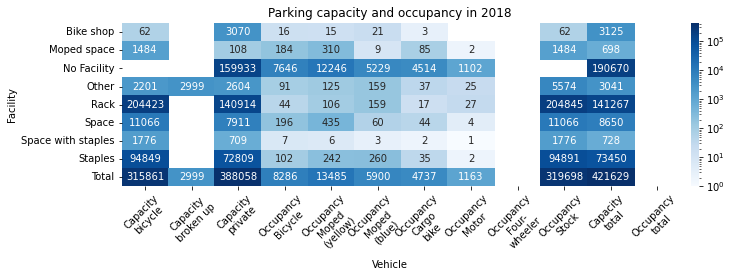

In [83]:
x_axis_labels = ['Capacity\nbicycle','Capacity\nbroken up','Capacity\nprivate','Occupancy\nBicycle','Occupancy\nMoped\n(yellow)','Occupancy\nMoped\n(blue)','Occupancy\nCargo\nbike','Occupancy\nMotor','Occupancy\nFour-\nwheeler','Occupancy\nStock','Capacity\ntotal','Occupancy\ntotal'] # labels for x-axis
y_axis_labels = ['Bike shop','Moped space','No Facility','Other','Rack','Space','Space with staples','Staples', 'Total'] # labels for y-axis

df = parking_2018[['facility_type', 'cap_bike',
       'cap_private','bike', 'moped_yellow', 'moped_blue',
       'cargo_bike', 'motor', 'fourwheeler', 'stock',
        'capacity', 'occupancy']].groupby(['facility_type']).sum().round(0).reset_index().set_index('facility_type').astype(int)
df = df.append(df.sum().rename('Total'))

fig, ax = plt.subplots(figsize=(12,3))  
sns.heatmap(df, 
          annot=True,fmt="d", norm=LogNorm(), cmap="Blues",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set(xlabel = "Vehicle", ylabel = "Facility", title='Parking capacity and occupancy in 2018')
plt.xticks(rotation=45) 
plt.show()

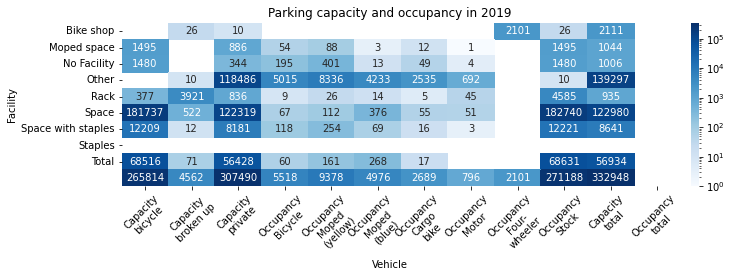

In [84]:
x_axis_labels = ['Capacity\nbicycle','Capacity\nbroken up','Capacity\nprivate','Occupancy\nBicycle','Occupancy\nMoped\n(yellow)','Occupancy\nMoped\n(blue)','Occupancy\nCargo\nbike','Occupancy\nMotor','Occupancy\nFour-\nwheeler','Occupancy\nStock','Capacity\ntotal','Occupancy\ntotal'] # labels for x-axis
y_axis_labels = ['Bike shop','Moped space','No Facility','Other','Rack','Space','Space with staples','Staples', 'Total'] # labels for y-axis

df = parking_2019[['facility_type', 'cap_bike',
       'cap_private','bike', 'moped_yellow', 'moped_blue',
       'cargo_bike', 'motor', 'fourwheeler', 'stock',
        'capacity', 'occupancy']].groupby(['facility_type']).sum().round(0).reset_index().set_index('facility_type').astype(int)
df = df.append(df.sum().rename('Total'))

fig, ax = plt.subplots(figsize=(12,3))  
sns.heatmap(df, 
          annot=True,fmt="d", norm=LogNorm(), cmap="Blues",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set(xlabel = "Vehicle", ylabel = "Facility", title='Parking capacity and occupancy in 2019')
plt.xticks(rotation=45) 
plt.show()

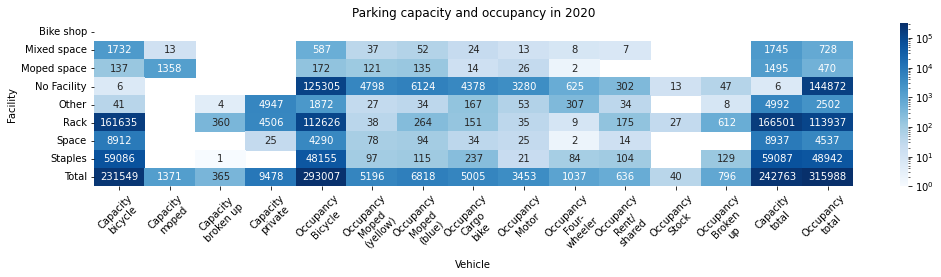

In [85]:
x_axis_labels = ['Capacity\nbicycle','Capacity\nmoped','Capacity\nbroken up','Capacity\nprivate','Occupancy\nBicycle','Occupancy\nMoped\n(yellow)','Occupancy\nMoped\n(blue)','Occupancy\nCargo\nbike','Occupancy\nMotor','Occupancy\nFour-\nwheeler','Occupancy\nRent/\nshared','Occupancy\nStock','Occupancy\nBroken\nup','Capacity\ntotal','Occupancy\ntotal'] # labels for x-axis
y_axis_labels = ['Bike shop','Mixed space','Moped space','No Facility','Other','Rack','Space','Staples','Total'] # labels for y-axis

df = parking_2020[['facility_type', 'cap_bike', 'cap_moped',
       'cap_brokenup', 'cap_private','bike', 'moped_yellow', 'moped_blue',
       'cargo_bike', 'motor', 'fourwheeler', 'rent_shared_bike', 'stock',
       'brokenup', 'capacity','occupancy']].groupby(['facility_type']).sum().round(0).reset_index().set_index('facility_type')
df = df.append(df.sum().rename('Total'))

fig, ax = plt.subplots(figsize=(17,3))  
sns.heatmap(df, 
          annot=True,fmt="d", norm=LogNorm(), cmap="Blues",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set(xlabel = "Vehicle", ylabel = "Facility", title='Parking capacity and occupancy in 2020')
plt.xticks(rotation=45) 
plt.show()

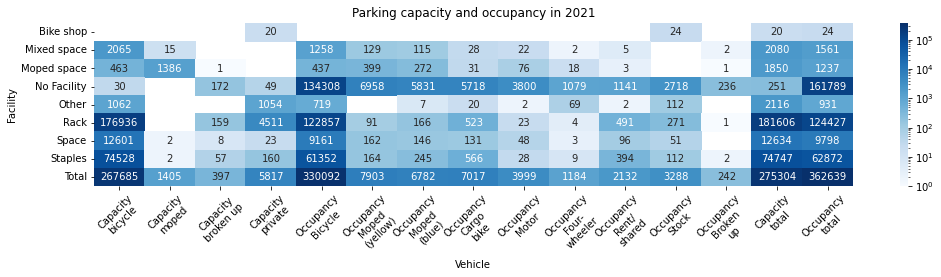

In [86]:
x_axis_labels = ['Capacity\nbicycle','Capacity\nmoped','Capacity\nbroken up','Capacity\nprivate','Occupancy\nBicycle','Occupancy\nMoped\n(yellow)','Occupancy\nMoped\n(blue)','Occupancy\nCargo\nbike','Occupancy\nMotor','Occupancy\nFour-\nwheeler','Occupancy\nRent/\nshared','Occupancy\nStock','Occupancy\nBroken\nup','Capacity\ntotal','Occupancy\ntotal'] # labels for x-axis
y_axis_labels = ['Bike shop','Mixed space','Moped space','No Facility','Other','Rack','Space','Staples','Total'] # labels for y-axis

df = parking_2021[['facility_type', 'cap_bike', 'cap_moped',
       'cap_brokenup', 'cap_private','bike', 'moped_yellow', 'moped_blue',
       'cargo_bike', 'motor', 'fourwheeler', 'rent_shared_bike', 'stock',
       'brokenup', 'capacity','occupancy']].groupby(['facility_type']).sum().round(0).reset_index().set_index('facility_type')
df = df.append(df.sum().rename('Total'))

fig, ax = plt.subplots(figsize=(17,3))  
sns.heatmap(df, 
          annot=True,fmt="d", norm=LogNorm(), cmap="Blues",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set(xlabel = "Vehicle", ylabel = "Facility", title='Parking capacity and occupancy in 2021')
plt.xticks(rotation=45) 
plt.show()

### **14 Explore geographical distribution of locations**

In [147]:
print("2018: " + str(vehicle_parking.loc[vehicle_parking.year == 2018].shape))
print("2019: " + str(vehicle_parking.loc[vehicle_parking.year == 2019].shape))
print("2020: " + str(vehicle_parking.loc[vehicle_parking.year == 2020].shape))
print("2021: " + str(vehicle_parking.loc[vehicle_parking.year == 2021].shape))

2018: (31595, 90)
2019: (15081, 90)
2020: (12495, 90)
2021: (15137, 90)


In [148]:
# Check distribution of the locations for the different datasets
vehicle_parking.section_2018.value_counts().value_counts(normalize=True)

1    0.530167
4    0.378713
3    0.076580
2    0.014541
Name: section_2018, dtype: float64

In [35]:
def plot_locations(year):
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.set_axis_off()
    ax.set_title(str(year), fontsize=14)
    base =  vehicle_parking.loc[vehicle_parking.year == 2018].set_geometry('geometry_line').plot(linewidth=0.2, ax=ax, color = 'lightgrey')
    ax = vehicle_parking.loc[vehicle_parking.year == year].set_geometry('geometry_line').plot(linewidth=0.15, ax=base, color = '#1D2F6F')
    plt.show()

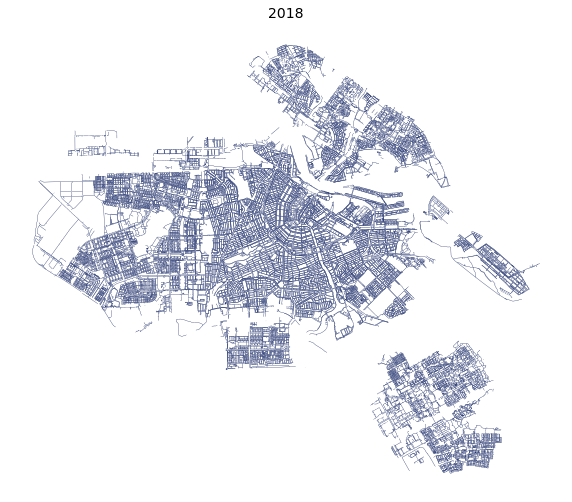

In [54]:
plot_locations(2018)

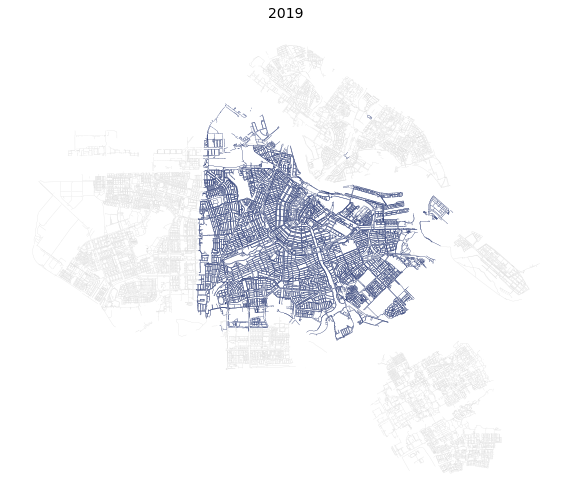

In [55]:
plot_locations(2019)

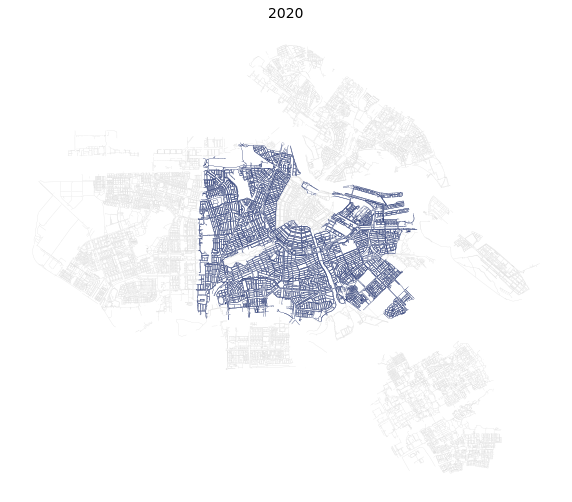

In [56]:
plot_locations(2020)

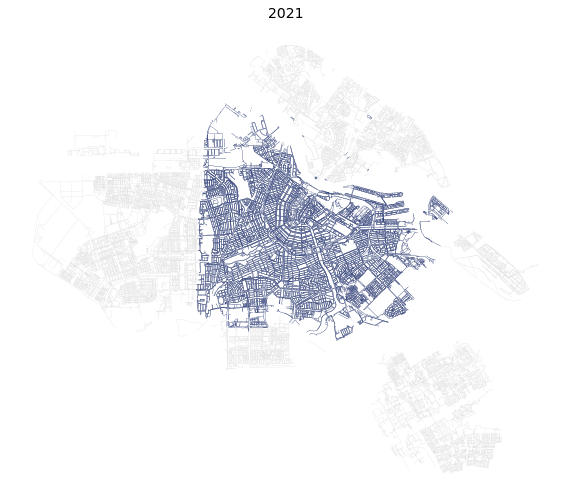

In [57]:
plot_locations(2021)

### **15 Explore parking behavior (with geospatial information)**

In [305]:
def plot_feature(df, feature, vmax, year, title, legend_title):
    sections_in_2021 = df.loc[df.year == 2021].section_2018.unique()    
    cmap = cm.RdYlGn
    cmap_reversed = cmap.reversed()
    f, ax = plt.subplots(1, figsize=(10, 10)) # figsize=(10, 10))
    ax.set_axis_off()
    ax.set_title(title + str(year), fontsize=16) #fontsize=14)
    base =  df.loc[df.year == 2021].set_geometry('geometry_line').plot(linewidth=0.3, ax=ax, color = 'whitesmoke')
    ax =  df.loc[(df.year == year) & (df.section_2018.isin(sections_in_2021))].set_geometry('geometry_line').plot(linewidth = 0.4, ax=base, column = feature, vmax = vmax, legend=True, cmap=cmap_reversed,
                     legend_kwds={'label': legend_title,'shrink': 0.5, 'pad':-0.05})
    plt.show()

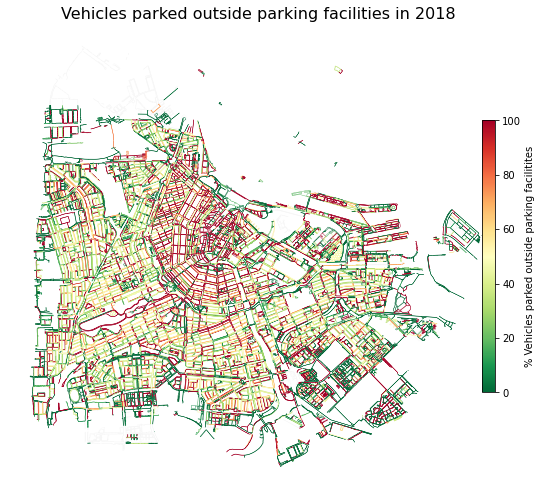

In [94]:
plot_feature(vehicle_parking, 'perc_out', 100, 2018, "Vehicles parked outside parking facilities in ",  "% Vehicles parked outside parking facilitites")

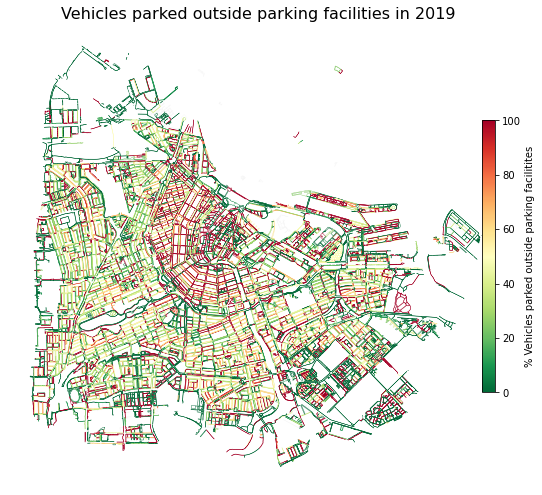

In [60]:
plot_feature(vehicle_parking, 'perc_out', 100, 2019, "Vehicles parked outside parking facilities in ",  "% Vehicles parked outside parking facilitites")

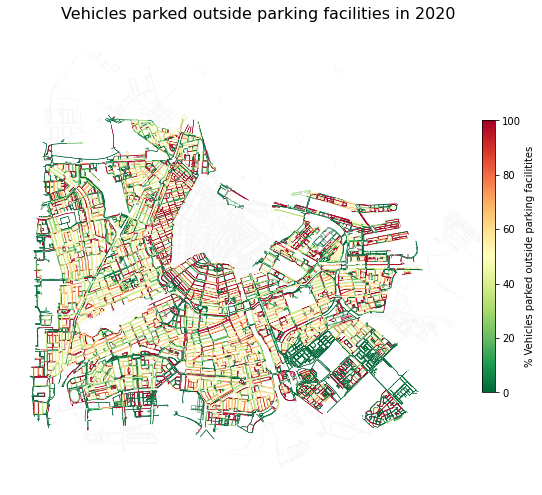

In [61]:
plot_feature(vehicle_parking, 'perc_out', 100, 2020, "Vehicles parked outside parking facilities in ",  "% Vehicles parked outside parking facilitites")

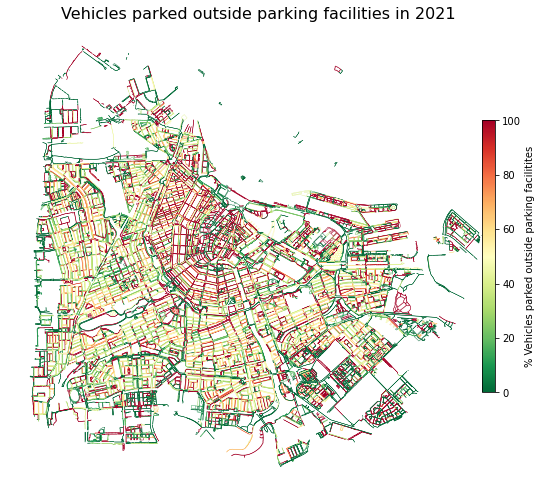

In [62]:
plot_feature(vehicle_parking, 'perc_out', 100, 2021, "Vehicles parked outside parking facilities in ",  "% Vehicles parked outside parking facilitites")

**Gross parking occupancy**

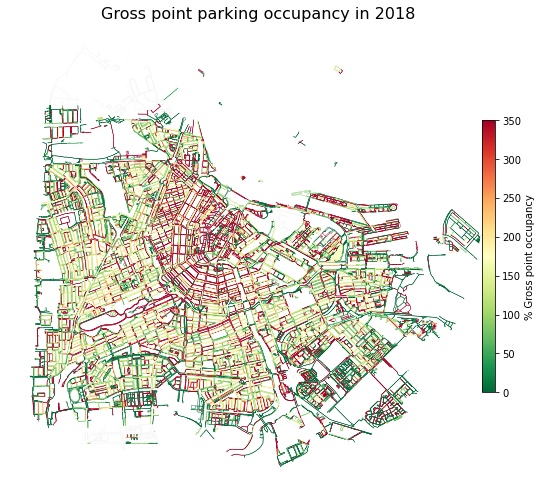

In [95]:
plot_feature(vehicle_parking, 'gross_point_occupancy', 350, 2018, "Gross point parking occupancy in ",  "% Gross point occupancy")

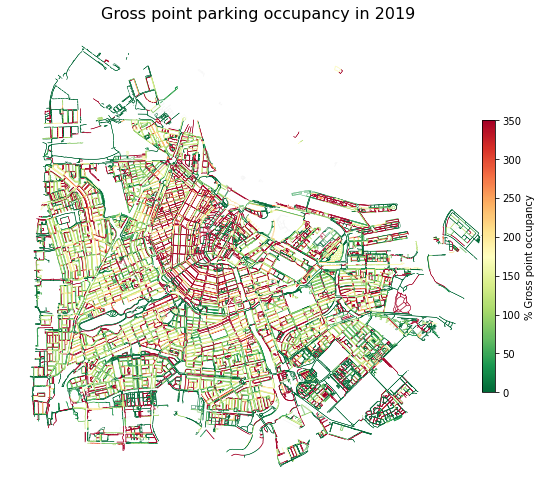

In [98]:
plot_feature(vehicle_parking, 'gross_point_occupancy', 350, 2019, "Gross point parking occupancy in ",  "% Gross point occupancy")

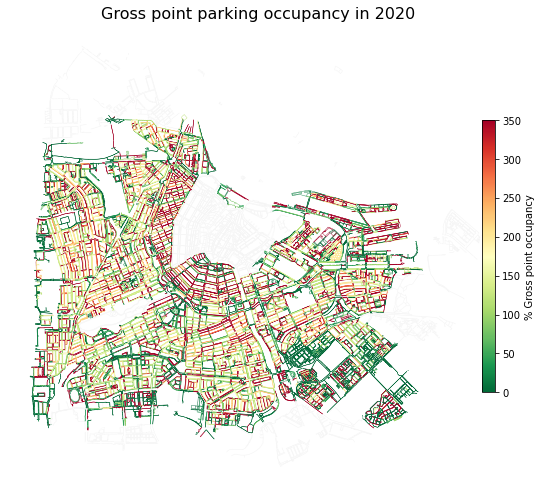

In [99]:
plot_feature(vehicle_parking, 'gross_point_occupancy', 350, 2020, "Gross point parking occupancy in ",  "% Gross point occupancy")

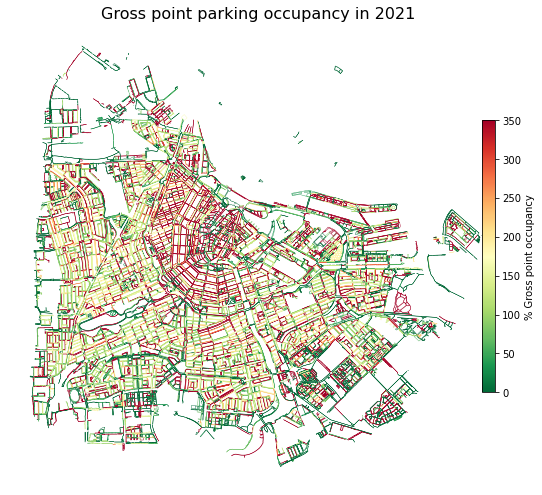

In [100]:
plot_feature(vehicle_parking, 'gross_point_occupancy', 350, 2021, "Gross point parking occupancy in ",  "% Gross point occupancy")

**Vehicles parked outside facilities per 100m2 sidewalk**

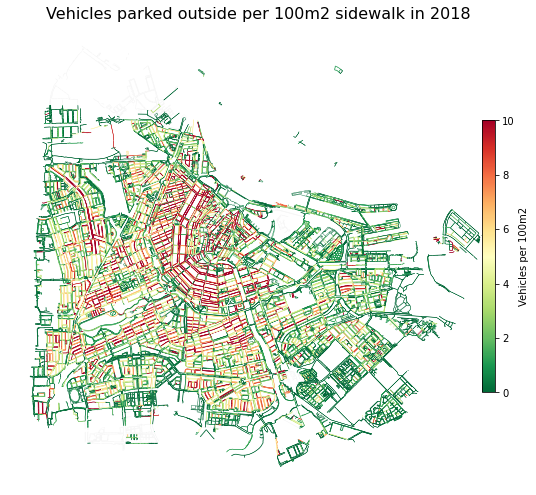

In [102]:
plot_feature(vehicle_parking, 'outside_vehicles_per_100m2', 10, 2018, "Vehicles parked outside per 100m2 sidewalk in ",  "Vehicles per 100m2")

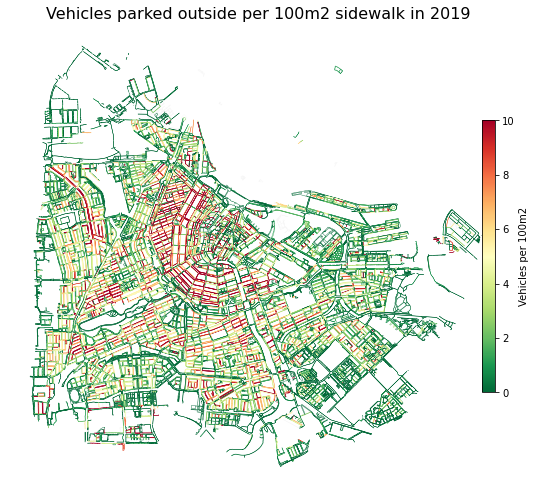

In [103]:
plot_feature(vehicle_parking, 'outside_vehicles_per_100m2', 10, 2019, "Vehicles parked outside per 100m2 sidewalk in ",  "Vehicles per 100m2")

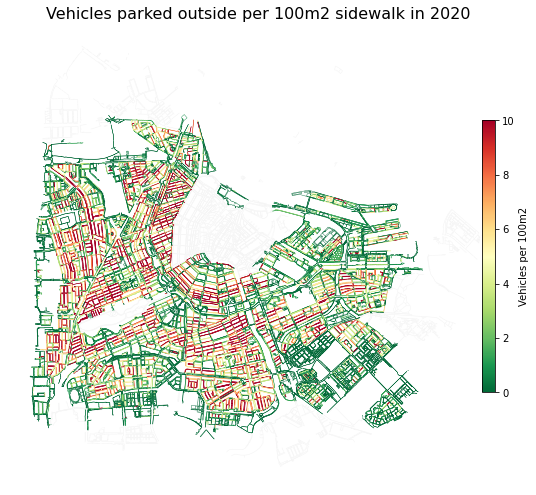

In [104]:
plot_feature(vehicle_parking, 'outside_vehicles_per_100m2', 10, 2020, "Vehicles parked outside per 100m2 sidewalk in ",  "Vehicles per 100m2")

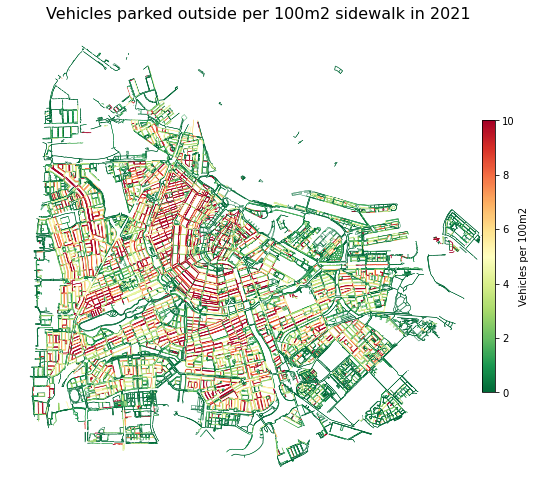

In [105]:
plot_feature(vehicle_parking, 'outside_vehicles_per_100m2', 10, 2021, "Vehicles parked outside per 100m2 sidewalk in ",  "Vehicles per 100m2")

### **16 Explore parking behavior per neighborhood**

In [156]:
# Group the data per neighborhood aggregating the main parking features
vehicle_parking_per_neighborhood = vehicle_parking.groupby(['neighborhood_name', 'year']).agg({'capacity' : 'mean','occupancy' : 'mean', 'outside_vehicles_per_100m2_clip': 'mean', 'total_vehicles_per_100m2_clip': 'mean','perc_out': 'mean','perc_in': 'mean','gross_point_occupancy_clip': 'mean','net_point_occupancy_clip': 'mean'})
vehicle_parking_per_neighborhood.columns = ["".join(x) for x in vehicle_parking_per_neighborhood.columns.ravel()]
vehicle_parking_per_neighborhood.reset_index(inplace=True)
vehicle_parking_per_neighborhood_with_geo = neighborhoods[['neighborhood_name','geometry']].merge(vehicle_parking_per_neighborhood, on = 'neighborhood_name', how='inner')

In [138]:
def plot_feature(df, feature, year, title, legend_title):
    neighborhoods_in_2021 = df.loc[df.year == 2021].neighborhood_name.unique()    
    cmap = cm.RdYlGn
    cmap_reversed = cmap.reversed()
    f, ax = plt.subplots(1, figsize=(8, 8)) # figsize=(10, 10))
    ax.set_axis_off()
    ax.set_title(title + str(year), fontsize=14) #fontsize=14)
    base =  df.loc[df.year == 2021].plot(ax=ax, color = 'whitesmoke')
    ax =  df.loc[(df.year == year) & (df.neighborhood_name.isin(neighborhoods_in_2021))].plot(ax=base, column = feature, vmin = min(df.loc[df.year == 2021][feature]), vmax = max(df.loc[df.year == 2021][feature]), legend=True, cmap=cmap_reversed,
                     legend_kwds={'label': legend_title,'shrink': 0.5, 'pad':-0.05})
    plt.show()

**Percentage of vehicles parked outside parking facilities**

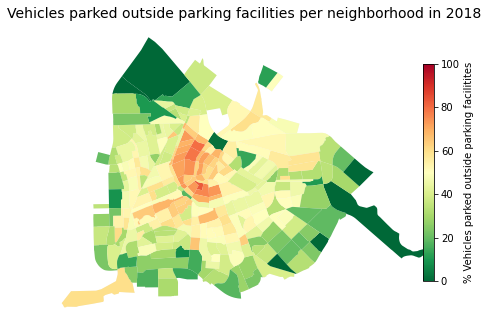

In [139]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'perc_out', 2018, "Vehicles parked outside parking facilities per neighborhood in ",  "% Vehicles parked outside parking facilitites")

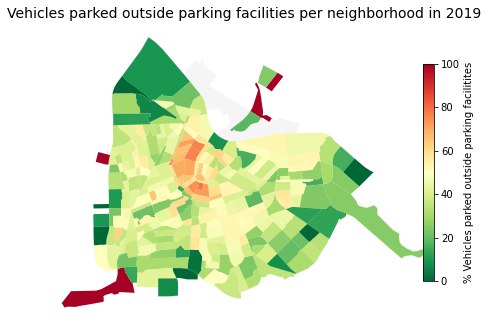

In [141]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'perc_out', 2019, "Vehicles parked outside parking facilities per neighborhood in ",  "% Vehicles parked outside parking facilitites")

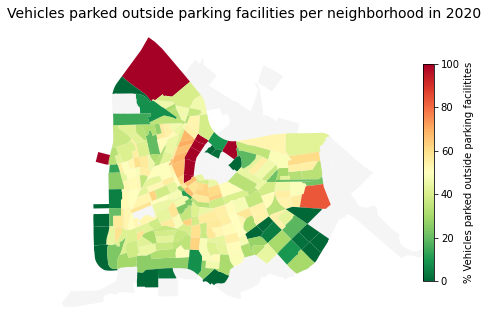

In [142]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'perc_out', 2020, "Vehicles parked outside parking facilities per neighborhood in ",  "% Vehicles parked outside parking facilitites")

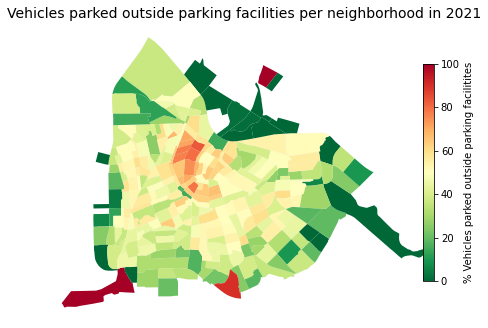

In [143]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'perc_out', 2021, "Vehicles parked outside parking facilities per neighborhood in ",  "% Vehicles parked outside parking facilitites")

**Gross point parking occupancy**

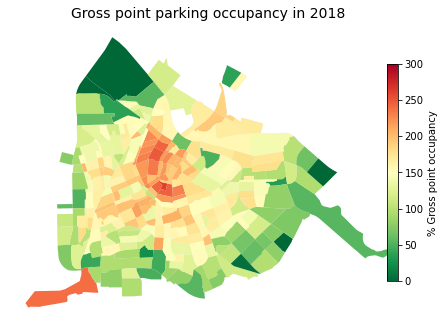

In [145]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'gross_point_occupancy_clip', 2018, "Gross point parking occupancy in ",  "% Gross point occupancy")

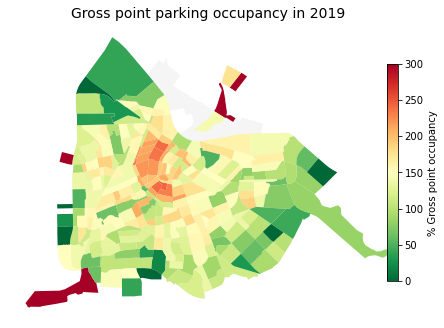

In [144]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'gross_point_occupancy_clip', 2019, "Gross point parking occupancy in ",  "% Gross point occupancy")

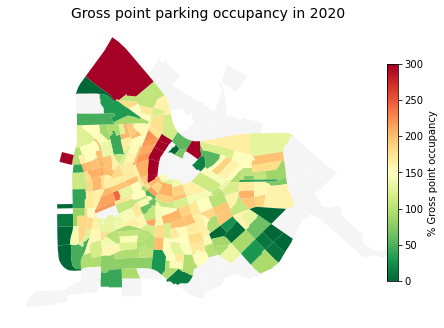

In [79]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'gross_point_occupancy_clip', 2020, "Gross point parking occupancy in ",  "% Gross point occupancy")

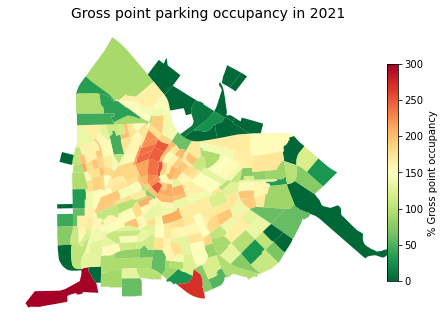

In [80]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'gross_point_occupancy_clip', 2021, "Gross point parking occupancy in ",  "% Gross point occupancy")

**Vehicles parked outside parking facilities per 100m2 sidewalk**

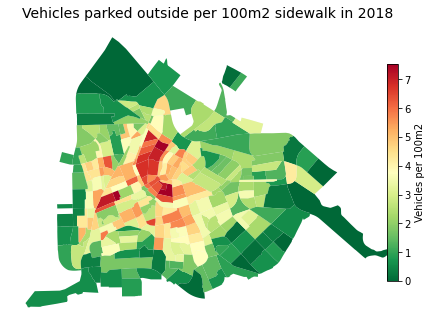

In [81]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'outside_vehicles_per_100m2_clip', 2018, "Vehicles parked outside per 100m2 sidewalk in ",  "Vehicles per 100m2")

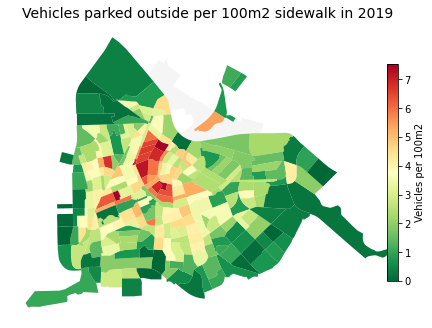

In [82]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'outside_vehicles_per_100m2_clip', 2019, "Vehicles parked outside per 100m2 sidewalk in ",  "Vehicles per 100m2")

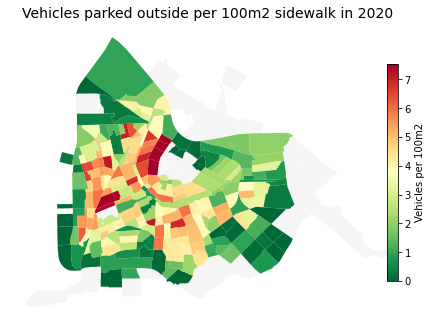

In [83]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'outside_vehicles_per_100m2_clip', 2020, "Vehicles parked outside per 100m2 sidewalk in ",  "Vehicles per 100m2")

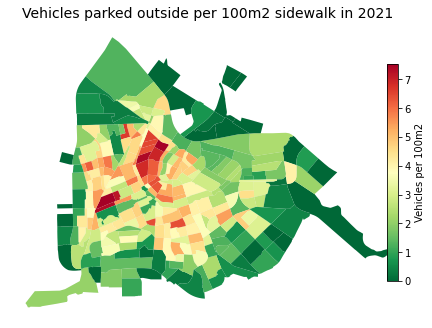

In [84]:
plot_feature(vehicle_parking_per_neighborhood_with_geo, 'outside_vehicles_per_100m2_clip', 2021, "Vehicles parked outside per 100m2 sidewalk in ",  "Vehicles per 100m2")

### **18 Merge parking data with parking data from previous years**

In [47]:
columns = ['section_2018',  'capacity', 'occupancy', 'occupancy_motorized',
       'occupancy_nonmotorized', 'occupancy_inside', 'occupancy_outside', 'occupancy_motorized_inside',
       'occupancy_motorized_outside', 'occupancy_nonmotorized_inside',
       'occupancy_nonmotorized_outside','perc_in', 'perc_out',
       'perc_in_motorized', 'perc_out_motorized', 'perc_in_nonmotorized',
       'perc_out_nonmotorized', 'net_point_occupancy', 'gross_point_occupancy',
       'occupancy_per_100m2', 'occupancy_outside_per_100m2',
       'occupancy_inside_per_100m2', 'occupancy_motorized_per_100m2',
       'occupancy_motorized_inside_per_100m2',
       'occupancy_motorized_outside_per_100m2',
       'occupancy_nonmotorized_per_100m2',
       'occupancy_nonmotorized_inside_per_100m2',
       'occupancy_nonmotorized_outside_per_100m2', 'capacity_per_100m2',
       'cap_bike', 'bike_inside','bike_outside','bike','moped_yellow','moped_blue','cargo_bike','motor','fourwheeler']

In [48]:
print('Size before merging: ' + str(vehicle_parking_2021.shape))
vehicle_parking_2021_merged = vehicle_parking_2021.merge(vehicle_parking_2020[columns], how='outer', on='section_2018', suffixes = (None, "_lag1")).merge(
    vehicle_parking_2019[columns], how='outer', on='section_2018', suffixes = (None, "_lag2")).merge(
    vehicle_parking_2018[columns], how='outer', on='section_2018', suffixes = (None, "_lag3"))
print('Size after merging: ' + str(vehicle_parking_2021_merged.shape))
vehicle_parking_2021_merged.head()

Size before merging: (15624, 90)
Size after merging: (32914, 201)


section_2018                                           geometry  \
0         13793  POLYGON ((547095.956 6864733.318, 547095.956 6...   
1         21603  POLYGON ((542947.696 6862168.052, 542940.088 6...   
2         15807  POLYGON ((544434.867 6862393.999, 544434.867 6...   
3         20554  POLYGON ((541942.991 6866380.957, 541942.791 6...   
4         14758  POLYGON ((548239.417 6861756.265, 548236.171 6...   

                 street    year day_part  bike_inside  bike_outside  \
0            Iepenplein  2021.0   middag          7.0          29.0   
1       Beethovenstraat  2021.0   middag          0.0           0.0   
2           Europaplein  2021.0   middag         20.0           3.0   
3        Ten Katestraat  2021.0   middag          0.0           0.0   
4  H.J.E. Wenckebachweg  2021.0   middag          0.0           1.0   

   brokenup_inside  brokenup_outside  cap_bike_inside  cap_brokenup_inside  \
0              0.0               0.0              6.0                  0.0   
1              0.0               0.0              0.0                  0.0   
2              0.0               0.0             40.0                  0.0   
3              0.0               0.0              0.0                  0.0   
4              0.0               0.0              0.0                  0.0   

   cap_moped_inside  cap_private_inside  capacity_inside  cargo_bike_inside  \
0               0.0                 0.0              6.0                0.0   
1               0.0                 0.0              0.0                0.0   
2               0.0                 0.0             40.0                0.0   
3               0.0                 0.0              0.0                0.0   
4               0.0                 0.0              0.0                0.0   

   cargo_bike_outside  fourwheeler_inside  fourwheeler_outside  \
0                 2.0                 0.0                  0.0   
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   moped_blue_inside  moped_blue_outside  moped_yellow_inside  \
0                0.0                 0.0                  0.0   
1                0.0                 0.0                  0.0   
2                0.0                 0.0                  0.0   
3                0.0                 0.0                  0.0   
4                0.0                 0.0                  0.0   

   moped_yellow_outside  motor_inside  motor_outside  occupancy_inside  \
0                   0.0           0.0            0.0               7.0   
1                   0.0           0.0            0.0               0.0   
2                   2.0           0.0            0.0              20.0   
3                   0.0           0.0            0.0               0.0   
4                   0.0           0.0            0.0               0.0   

   occupancy_outside  occupancy_motorized_inside  occupancy_motorized_outside  \
0               31.0                         0.0                          0.0   
1                0.0                         0.0                          0.0   
2                8.0                         0.0                          2.0   
3                0.0                         0.0                          0.0   
4                1.0                         0.0                          0.0   

   occupancy_nonmotorized_inside  occupancy_nonmotorized_outside  \
0                            7.0                            31.0   
1                            0.0                             0.0   
2                           20.0                             6.0   
3                            0.0                             0.0   
4                            0.0                             1.0   

   rent_shared_bike_inside  rent_shared_bike_outside  stock_inside  \
0           

In [49]:
print('Size before merging: ' + str(vehicle_parking_2020.shape))
vehicle_parking_2020_merged = vehicle_parking_2020.merge(vehicle_parking_2019[columns], how='outer', on='section_2018', suffixes = (None, "_lag1")).merge(
    vehicle_parking_2018[columns], how='outer', on='section_2018', suffixes = (None, "_lag2"))
print('Size after merging: ' + str(vehicle_parking_2020_merged.shape))
vehicle_parking_2020_merged.head()

Size before merging: (12901, 90)
Size after merging: (32740, 164)


section_2018                                           geometry  \
0         13793  POLYGON ((547095.956 6864733.318, 547095.956 6...   
1         12744  POLYGON ((549759.863 6863099.700, 549756.777 6...   
2         21603  POLYGON ((542946.247 6862171.722, 542942.347 6...   
3         15807  POLYGON ((544434.867 6862393.999, 544434.867 6...   
4         20554  POLYGON ((541942.991 6866380.957, 541942.791 6...   

                 street    year day_part  bike_inside  bike_outside  \
0            Iepenplein  2020.0    avond          7.0          12.0   
1  Robert Kochplantsoen  2020.0    avond          0.0           0.0   
2       Beethovenstraat  2020.0    avond          0.0           0.0   
3           Europaplein  2020.0    avond          1.0           0.0   
4        Ten Katestraat  2020.0    avond          0.0           0.0   

   brokenup_inside  brokenup_outside  cap_bike_inside  cap_brokenup_inside  \
0              0.0               0.0              6.0                  0.0   
1              0.0               0.0              0.0                  0.0   
2              0.0               0.0              0.0                  0.0   
3              0.0               0.0              0.0                  0.0   
4              0.0               0.0              0.0                  0.0   

   cap_moped_inside  cap_private_inside  capacity_inside  cargo_bike_inside  \
0               0.0                 0.0              6.0                0.0   
1               0.0                 0.0              0.0                0.0   
2               0.0                 0.0              0.0                0.0   
3               0.0               320.0            320.0                0.0   
4               0.0                 0.0              0.0                0.0   

   cargo_bike_outside  fourwheeler_inside  fourwheeler_outside  \
0                 1.0                 0.0                  0.0   
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   moped_blue_inside  moped_blue_outside  moped_yellow_inside  \
0                0.0                 1.0                  0.0   
1                0.0                 0.0                  0.0   
2                0.0                 0.0                  0.0   
3                0.0                 0.0                  0.0   
4                0.0                 1.0                  0.0   

   moped_yellow_outside  motor_inside  motor_outside  occupancy_inside  \
0                   1.0           0.0            0.0               7.0   
1                   0.0           0.0            0.0               0.0   
2                   0.0           0.0            0.0               0.0   
3                   0.0           0.0            0.0               1.0   
4                   1.0           0.0            0.0               0.0   

   occupancy_outside  occupancy_motorized_inside  occupancy_motorized_outside  \
0               15.0                         0.0                          2.0   
1                0.0                         0.0                          0.0   
2                0.0                         0.0                          0.0   
3                0.0                         0.0                          0.0   
4                2.0                         0.0                          2.0   

   occupancy_nonmotorized_inside  occupancy_nonmotorized_outside  \
0                            7.0                            13.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            1.0                             0.0   
4                            0.0                             0.0   

   rent_shared_bike_inside  rent_shared_bike_outside  stock_inside  \
0           

In [50]:
print('Size before merging: ' + str(vehicle_parking_2019.shape))
vehicle_parking_2019_merged = vehicle_parking_2019.merge(vehicle_parking_2018[columns], how='outer', on='section_2018', suffixes = (None, "_lag1"))
print('Size after merging: ' + str(vehicle_parking_2019_merged.shape))
vehicle_parking_2019_merged.head()

Size before merging: (15526, 90)
Size after merging: (32722, 127)


section_2018                                           geometry  \
0         13793  POLYGON ((547095.956 6864733.318, 547095.956 6...   
1         12744  POLYGON ((549759.863 6863099.700, 549756.777 6...   
2         21603  POLYGON ((542946.247 6862171.722, 542942.347 6...   
3         15807  POLYGON ((544434.867 6862393.999, 544434.867 6...   
4         20554  POLYGON ((541942.991 6866380.957, 541942.791 6...   

                 street    year day_part  bike_inside  bike_outside  \
0            Iepenplein  2019.0   middag          5.0          17.0   
1  Robert Kochplantsoen  2019.0   middag         44.0           3.0   
2       Beethovenstraat  2019.0   middag          0.0           0.0   
3           Europaplein  2019.0   middag         17.0           0.0   
4        Ten Katestraat  2019.0   middag          0.0           0.0   

   brokenup_inside  brokenup_outside  cap_bike_inside  cap_brokenup_inside  \
0              0.0               0.0              6.0                  0.0   
1              0.0               0.0              0.0                  0.0   
2              0.0               0.0              0.0                  0.0   
3              0.0               0.0            178.0                  0.0   
4              0.0               0.0              0.0                  0.0   

   cap_moped_inside  cap_private_inside  capacity_inside  cargo_bike_inside  \
0               0.0                 0.0              6.0                1.0   
1               0.0                55.0             55.0                0.0   
2               0.0                 0.0              0.0                0.0   
3               0.0                 0.0            178.0                0.0   
4               0.0                 0.0              0.0                0.0   

   cargo_bike_outside  fourwheeler_inside  fourwheeler_outside  \
0                 0.0                 0.0                  0.0   
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   moped_blue_inside  moped_blue_outside  moped_yellow_inside  \
0                0.0                 1.0                  0.0   
1                0.0                 0.0                  2.0   
2                0.0                 0.0                  0.0   
3                0.0                 0.0                  0.0   
4                0.0                 0.0                  0.0   

   moped_yellow_outside  motor_inside  motor_outside  occupancy_inside  \
0                   1.0           0.0            0.0               6.0   
1                   1.0           0.0            0.0              46.0   
2                   0.0           0.0            0.0               0.0   
3                   0.0           0.0            0.0              17.0   
4                   0.0           0.0            0.0               0.0   

   occupancy_outside  occupancy_motorized_inside  occupancy_motorized_outside  \
0               19.0                         0.0                          2.0   
1                4.0                         2.0                          1.0   
2                0.0                         0.0                          0.0   
3                0.0                         0.0                          0.0   
4                0.0                         0.0                          0.0   

   occupancy_nonmotorized_inside  occupancy_nonmotorized_outside  \
0                            6.0                            17.0   
1                           44.0                             3.0   
2                            0.0                             0.0   
3                           17.0                             0.0   
4                            0.0                             0.0   

   rent_shared_bike_inside  rent_shared_bike_outside  stock_inside  \
0           

In [51]:
# Change names of the historical features
for column in columns[1:]:
    vehicle_parking_2019_merged[column+'_mean'] = vehicle_parking_2019_merged[column+'_lag1']
    vehicle_parking_2020_merged[column+'_mean'] = vehicle_parking_2020_merged[[column+'_lag1', column+'_lag2']].mean(axis=1)
    vehicle_parking_2021_merged[column+'_mean'] = vehicle_parking_2021_merged[[column+'_lag1', column+'_lag2', column+'_lag3']].mean(axis=1)

In [52]:
vehicle_parking_2019_merged['year'] = 2019
vehicle_parking_2020_merged['year'] = 2020
vehicle_parking_2021_merged['year'] = 2021

In [54]:
# Save the data
vehicle_parking_2019_merged.drop(['mbr_points', 'mbr_lengths', 'geometry_line'], inplace=True, axis=1)
vehicle_parking_2019_merged.to_csv(main_path + "/vehicle_parking_2019_merged_all.csv", index = False)

vehicle_parking_2020_merged.drop(['mbr_points', 'mbr_lengths', 'geometry_line'], inplace=True, axis=1)
vehicle_parking_2020_merged.to_csv(main_path + "/vehicle_parking_2020_merged_all.csv", index = False)

vehicle_parking_2021_merged.drop(['mbr_points', 'mbr_lengths', 'geometry_line'], inplace=True, axis=1)
vehicle_parking_2021_merged.to_csv(main_path + "/vehicle_parking_2021_merged_all.csv", index = False)